# Mushroom Classification  
### Edible or certain death?

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Overview:

In [2]:
# Mushroom Classificaiton Data Set from UCI Machine Learning Repository
df = pd.read_csv("~/Desktop/Winter_2020/Cogs_118A/FinalProject/COGS118A_FinalProject/Data/mushrooms.csv")
df_copy = df
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

**About this Data Set**:  

**Used with permission of instructor**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leaflets three, let it be'' for Poisonous Oak and Ivy. (1)
  
**Target feature**:  

 -  **Class**: poisonous=p, edible=e
   
**Feature Values**:  
 - **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s  
 - **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s  
 - **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y  
 - **bruises?**: bruises=t, no=f  
 - **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s  
 - **gill-attachment**: attached=a, descending=d, free=f, notched=n  
 - **gill-spacing**: close=c ,crowded=w, distant=d  
 - **gill-size**: broad=b, narrow=n  
 - **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y  
 - **stalk-shape**: enlarging=e, tapering=t  
 - **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?  
 - **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s  
 - **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s  
 - **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
 - **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
 - **veil-type**: partial=p, universal=u  
 - **veil-color**: brown=n, orange=o, white=w, yellow=y  
 - **ring-number**: none=n, one=o, two=t  
 - **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z  
 - **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y  
 - **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y  
 - **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d  
   

Source: https://archive.ics.uci.edu/ml/datasets/mushroom (1)

## Exploratory Data Analysis

In [3]:
# preview of dataset
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
# Checking data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# checking for NA values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# types of classes for classification
df['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
# size of df
df.shape

(8124, 23)

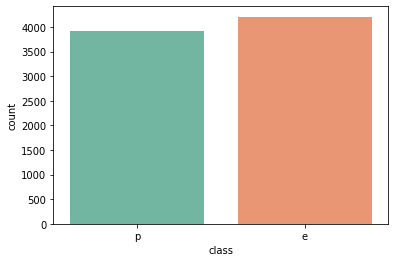

In [8]:
# plot frequency of edible and poisonous mushrooms
sns.countplot(x="class", data=df, palette="Set2")
plt.show()

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
poisonous = df[df['class'] == 'p'].shape[0]
edible = df[df['class'] == 'e'].shape[0]
print("Percentage of Edible Mushrooms: {:.2f}%".format((edible / (len(df['class']))*100)))
print("Percentage of Poisonous Mushrooms: {:.2f}%".format((poisonous / (len(df['class']))*100)))

Percentage of Edible Mushrooms: 51.80%
Percentage of Poisonous Mushrooms: 48.20%


 - 51.80% (4208) of mushrooms are edible in the data set 
 - 48.20% (3916) of mushrooms are poisonous in the data set 
 - Mushroom class is a balanced feature

### Data Preprocessing

When working with categorical data it is useful to convert the data into numerical representations for analysis

In [11]:
# Assigning features to X and targets to y
X = df.drop(['class'],axis=1)
y = df['class']

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in X:
    X[col] = le.fit_transform(X[col])

### Random Forest Classifier to find the top features of Data Set

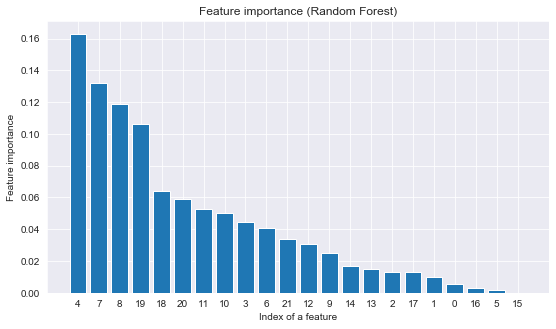

In [13]:
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(9,5))
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Feature importance (Random Forest)")
plt.xlabel('Index of a feature')
plt.ylabel('Feature importance')
plt.show()

### Top 5 features in Data Set:

In [14]:
top_features = X.iloc[:,indices[:5]].columns
print(top_features)

Index(['odor', 'gill-size', 'gill-color', 'spore-print-color', 'ring-type'], dtype='object')


**Top 5 features for predicting class label**:  
1. Odor  
2. Gill-Size  
3. Gill-Color  
4. Ring-Type  
5. Spore-Print-Color  

### Feature: Odor

According to the Random Forest Classifier the best feature for predicting whether or not a mushroom is poisonous or not is odor.

Available odors for mushrooms from this data set are:  
  
 - almond = a  
 - anise = l  
 - creosote = c  
 - fishy = y  
 - foul = f  
 - musty = m  
 - none = n  
 - pungent = p  
 - spicy = s 

In [15]:
df['odor'].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [16]:
# creating a new data frame for feature odor with a 'count' column
df_odor = df.groupby(["odor"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_odor = df_odor.sort_values("count", ascending = False).reset_index()

df_odor

index odor  count
0      5    n   3528
1      2    f   2160
2      7    s    576
3      8    y    576
4      0    a    400
5      3    l    400
6      6    p    256
7      1    c    192
8      4    m     36

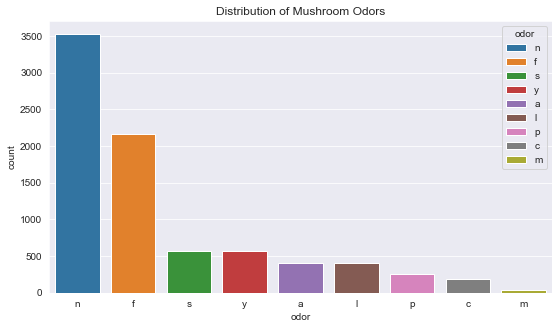

In [17]:
# plotting mushroom odor distribution
plt.figure(figsize = (9,5))
sns.barplot(x = "odor",y="count", 
            hue = "odor",
            data = df_odor,
            dodge = False)
sns.set(style='darkgrid')
plt.title("Distribution of Mushroom Odors")
plt.show()

Most common odors among mushrooms:  
 - None  
 - Foul  
 - Spicy  
 - Fishy  

In [18]:
# create df grouping by class and odor adding a 'count' column
df_odor_to_class = df.groupby(["class","odor"]).size().reset_index(name = "count")
df_odor_to_class = df_odor_to_class.sort_values("count", ascending = False).reset_index()
df_odor_to_class

index class odor  count
0      2     e    n   3408
1      4     p    f   2160
2      8     p    s    576
3      9     p    y    576
4      0     e    a    400
5      1     e    l    400
6      7     p    p    256
7      3     p    c    192
8      6     p    n    120
9      5     p    m     36

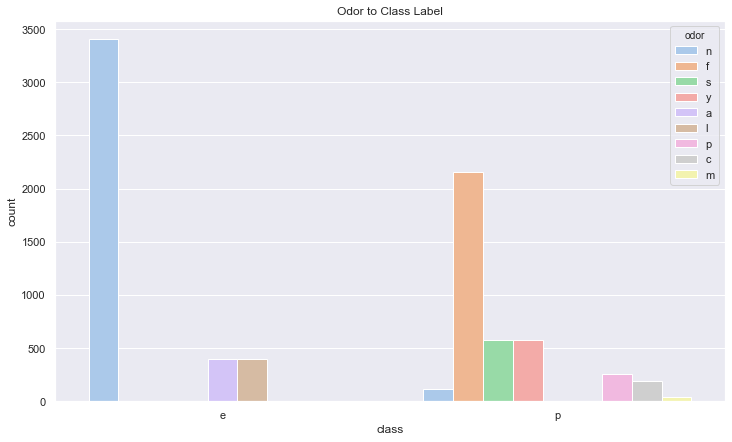

In [19]:
# bar plot for comparison with odor and class
plt.figure(figsize = (12,7))
sns.barplot(x = "class",y="count", 
            hue = "odor",
            data = df_odor_to_class,
            palette = 'pastel')
sns.set(style='darkgrid')
plt.title("Odor to Class Label")
plt.show()

 - Most mushrooms with no odor are edible, however, it is not a certainty that it will be edible  
 - All mushrooms with almond and anise odors are edible in the data set    
 - All mushrooms with foul, spicy, fishy, pungent, creosote, and musty odors are poisonous in the data set 

For each mushroom with respect to odor we can perform a calculation:  
  
$$
\frac{\text{poisonous}}{\text{poisonous} + \text{edible}}
$$

In [20]:
odor_type = df['odor'].unique()

for odor in odor_type:
    new_df = df[df['odor'] == odor]
    poisonous = new_df[new_df['class'] == 'p'].shape[0]
    edible = new_df[new_df['class'] == 'e'].shape[0]
    print(f'Proportion of mushrooms with odor {odor} are poisonous is: {poisonous/(poisonous+edible)}')

Proportion of mushrooms with odor p are poisonous is: 1.0
Proportion of mushrooms with odor a are poisonous is: 0.0
Proportion of mushrooms with odor l are poisonous is: 0.0
Proportion of mushrooms with odor n are poisonous is: 0.034013605442176874
Proportion of mushrooms with odor f are poisonous is: 1.0
Proportion of mushrooms with odor c are poisonous is: 1.0
Proportion of mushrooms with odor y are poisonous is: 1.0
Proportion of mushrooms with odor s are poisonous is: 1.0
Proportion of mushrooms with odor m are poisonous is: 1.0


 - As suspected if odors are not type **a** (almond), **l** (anise), or **n** (none) then they will be poisonous in our data set

### Feature: Gill-Size

A mushroom gill, or lamella, is a papery hyphenophore rib under the cap of some mushroom species, most often but not always agarics. Simply put, it is the part underneath the cap of a mushroom. (2)

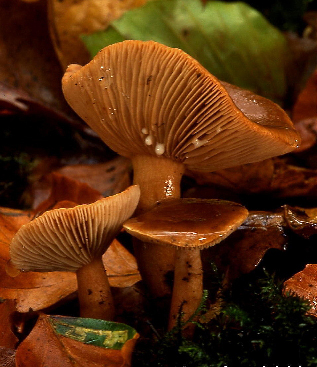

Source / Image Source: https://en.wikipedia.org/wiki/Lamella_(mycology) (2)

The mushroom gills in our data set can be:  
 - Broad = b  
 - Narrow = n

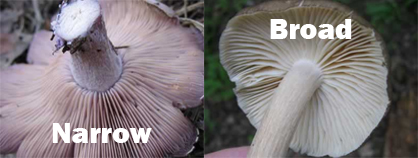

Image Source: http://www.tanelorn.us/data/mycology/myc_id_gills.htm (3)

In [21]:
df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [22]:
df_gillsize_to_class = df.groupby(["class","gill-size"]).size().reset_index(name = "count")
df_gillsize_to_class

class gill-size  count
0     e         b   3920
1     e         n    288
2     p         b   1692
3     p         n   2224

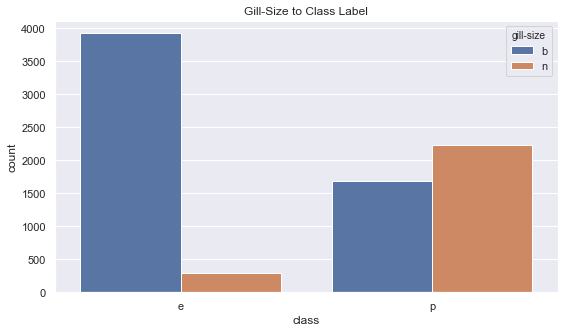

In [23]:
# bar plot for comparison with gill-size and class
plt.figure(figsize = (9,5))
sns.barplot(x = "class",y="count", 
            hue = "gill-size",
            data = df_gillsize_to_class)
sns.set(style='darkgrid')
plt.title("Gill-Size to Class Label")
plt.show()

 - A majority of narrow gilled mushrooms are poisonous  
 - Broad gilled mushrooms are more likely to edible  
 - However whether or not a mushroom is edible cannot be determined by the gill alone in our data set

### Feature: Gill-Color

Mushrooms gills in our data set come in a variety of colors:  
 - Black = k
 - Brown = n 
 - Buff = b 
 - Chocolate = h 
 - Gray = g 
 - Green = r 
 - Orange = o 
 - Pink = p 
 - Purple = u 
 - Red = e 
 - White = w  
 - Yellow = y 

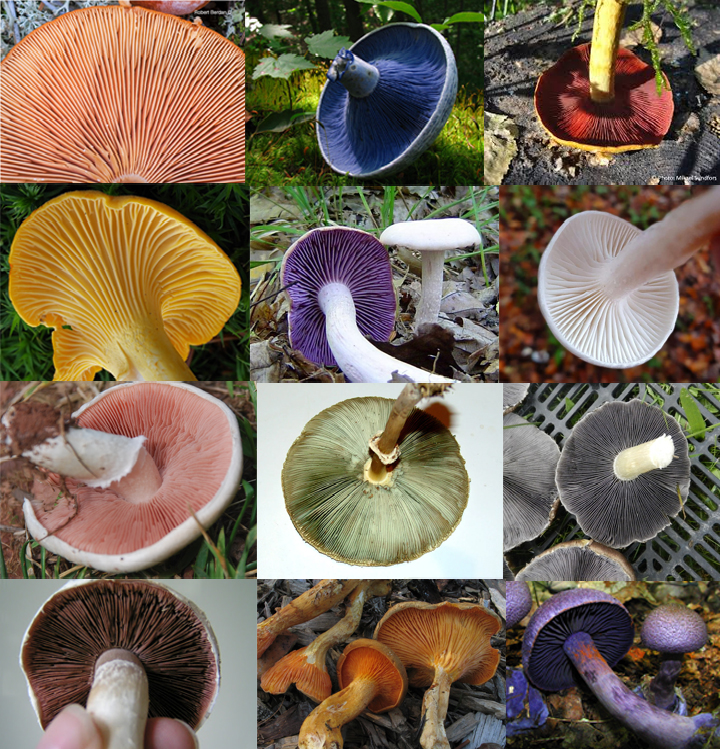

Source: Collage of mushroom gills made by me from images of a variety of mushrooms pages on Wikipedia

In [24]:
df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [25]:
# creating a new data frame for feature odor with a 'count' column
df_gill_color = df.groupby(["gill-color"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_gill_color = df_gill_color.sort_values("count", ascending = False).reset_index()

df_gill_color

index gill-color  count
0       0          b   1728
1       7          p   1492
2      10          w   1202
3       5          n   1048
4       2          g    752
5       3          h    732
6       9          u    492
7       4          k    408
8       1          e     96
9      11          y     86
10      6          o     64
11      8          r     24

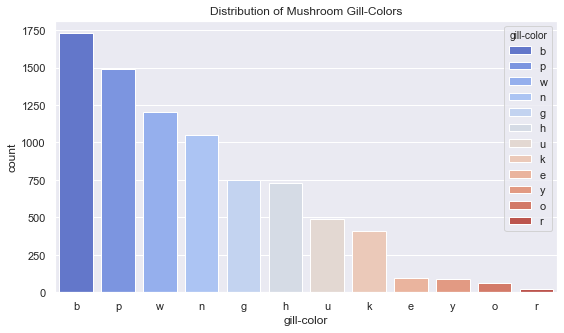

In [26]:
# plotting mushroom gill-color distribution
plt.figure(figsize = (9,5))
sns.barplot(x = "gill-color",y="count", 
            hue = "gill-color",
            data = df_gill_color,
            dodge = False, 
            palette = 'coolwarm')
sns.set(style='darkgrid')
plt.title("Distribution of Mushroom Gill-Colors")
plt.show()

Most common mushroom gill-colors:  
 - Buff  
 - Pink  
 - White  
 - Brown

In [27]:
# create df grouping by class and gill-color adding a 'count' column
df_gill_color_to_class = df.groupby(["class","gill-color"]).size().reset_index(name = "count")
df_gill_color_to_class = df_gill_color_to_class.sort_values("count", ascending = False).reset_index()
df_gill_color_to_class.head()

index class gill-color  count
0     10     p          b   1728
1      8     e          w    956
2      4     e          n    936
3      6     e          p    852
4     15     p          p    640

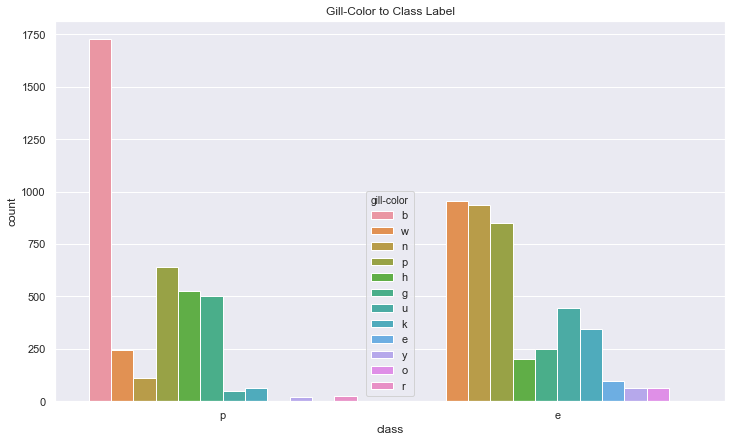

In [28]:
# bar plot for comparison with odor and class
plt.figure(figsize = (12,7))
sns.barplot(x = "class",y="count", 
            hue = "gill-color",
            data = df_gill_color_to_class)
sns.set(style='darkgrid')
plt.title("Gill-Color to Class Label")
plt.show()

 - Mushrooms gills with the color buff are always poisonous in our data set

For each mushroom with respect to gill-color we can perform a calculation:  
  
$$
\frac{\text{poisonous}}{\text{poisonous} + \text{edible}}
$$

In [29]:
color_type = df['gill-color'].unique()

for color in color_type:
    new_df = df[df['gill-color'] == color]
    poisonous = new_df[new_df['class'] == 'p'].shape[0]
    edible = new_df[new_df['class'] == 'e'].shape[0]
    print(f'Proportion of mushrooms with gill-color {color} are poisonous is: {poisonous/(poisonous+edible)}')

Proportion of mushrooms with gill-color k are poisonous is: 0.1568627450980392
Proportion of mushrooms with gill-color n are poisonous is: 0.10687022900763359
Proportion of mushrooms with gill-color g are poisonous is: 0.6702127659574468
Proportion of mushrooms with gill-color p are poisonous is: 0.4289544235924933
Proportion of mushrooms with gill-color w are poisonous is: 0.20465890183028287
Proportion of mushrooms with gill-color h are poisonous is: 0.7213114754098361
Proportion of mushrooms with gill-color u are poisonous is: 0.0975609756097561
Proportion of mushrooms with gill-color e are poisonous is: 0.0
Proportion of mushrooms with gill-color b are poisonous is: 1.0
Proportion of mushrooms with gill-color r are poisonous is: 1.0
Proportion of mushrooms with gill-color y are poisonous is: 0.2558139534883721
Proportion of mushrooms with gill-color o are poisonous is: 0.0


 - Mushrooms with gill-color b (buff) and r (green) are always poisonous in our data set  
 - Mushrooms with gill-color o (orange) and e (red) are always edible in our data set  

### Feature: Ring-Type

Mushroom ring types, or annulus, is the ring-like structure found on the stem of some species of mushrooms. (4)  
  
Ring-types in our data set:
  
 - Cobwebby = c 
 - Evanescent = e 
 - Flaring = f 
 - Large = l 
 - None = n  
 - Pendant = p 
 - Sheathing = s 
 - Zone = z


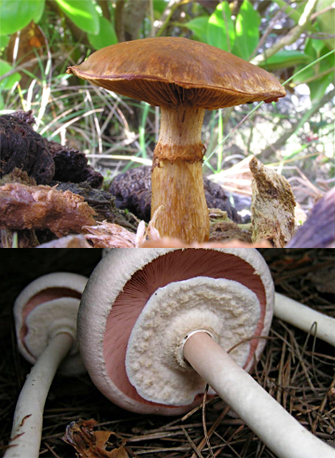

Source / Image Soruces:  
https://en.wikipedia.org/wiki/Annulus_(mycology) (top image) (4)   
https://www.mushroomexpert.com/glossary.html (bottom image) (5)

In [30]:
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [31]:
# creating a new data frame grouping by feature ring-type and target class with a 'count' column
df_ring_to_class = df.groupby(["class","ring-type"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_ring_to_class = df_ring_to_class.sort_values("count", ascending = False).reset_index()

df_ring_to_class

index class ring-type  count
0      2     e         p   3152
1      3     p         e   1768
2      4     p         l   1296
3      0     e         e   1008
4      6     p         p    816
5      1     e         f     48
6      5     p         n     36

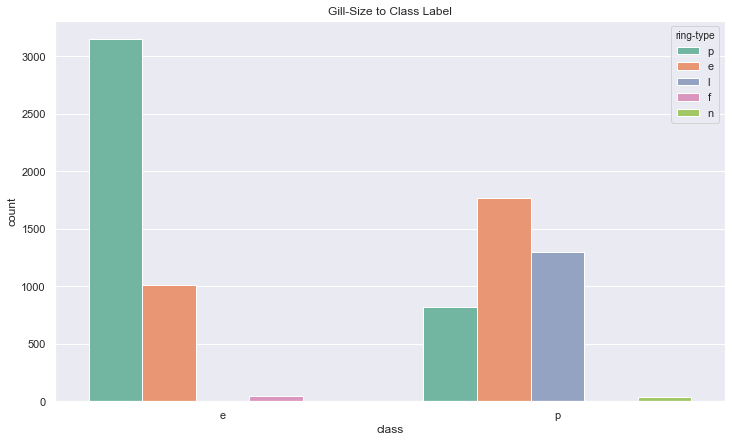

In [32]:
# bar plot for comparison with ring-type and class
plt.figure(figsize = (12,7))
sns.barplot(x = "class",y="count", 
            hue = "ring-type",
            data = df_ring_to_class,
            palette = 'Set2')
sns.set(style='darkgrid')
plt.title("Gill-Size to Class Label")
plt.show()

 - Mushrooms with ring-type f (flaring) are always edible in our data set  
 - Mushrooms with ring-type l (large) and n (none) are always poisonous in our data set  
 - A majority of mushrooms with ring-type p (pendant) are edible

### Feature: Spore-Print-Color 

The spore print is the powdery deposit obtained by allowing spores of a fungal fruit body to fall onto a surface underneath. That is, it shows the color of the mushroom spores if viewed en masse. (6)  
  
Source: https://en.wikipedia.org/wiki/Spore_print (6)

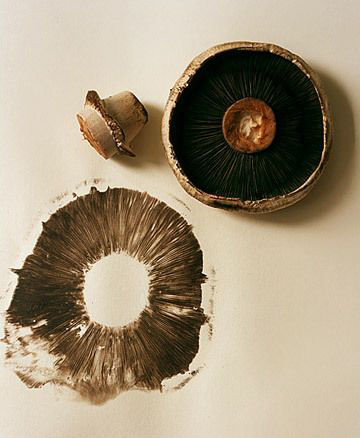

Image Source: https://www.pinterest.com/pin/234398355591850160/ (7)

Possible mushroom spore print colors in our data:  
 - Black = k,  
 - Brown = n  
 - Buff = b  
 - Chocolate = h 
 - Green = r 
 - Orange = o 
 - Purple = u 
 - White = w 
 - Yellow = y 

In [33]:
df['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
u      48
b      48
y      48
o      48
Name: spore-print-color, dtype: int64

In [34]:
# creating a new data frame grouping by feature ring-type and target class with a 'count' column
df_spore_to_class = df.groupby(["class","spore-print-color"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_spore_to_class = df_spore_to_class.sort_values("count", ascending = False).reset_index()

df_spore_to_class

index class spore-print-color  count
0      12     p                 w   1812
1       3     e                 n   1744
2       2     e                 k   1648
3       8     p                 h   1584
4       6     e                 w    576
5       9     p                 k    224
6      10     p                 n    224
7      11     p                 r     72
8       0     e                 b     48
9       1     e                 h     48
10      4     e                 o     48
11      5     e                 u     48
12      7     e                 y     48

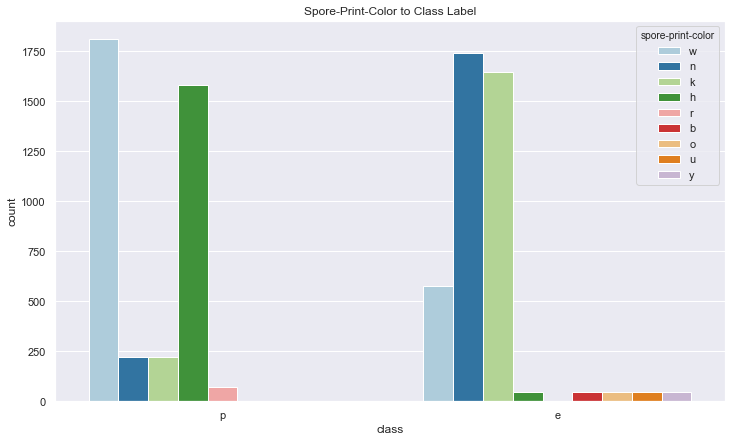

In [35]:
# bar plot for comparison with ring-type and class
plt.figure(figsize = (12,7))
sns.barplot(x = "class",y="count", 
            hue = "spore-print-color",
            data = df_spore_to_class,
            palette= "Paired")
sns.set(style='darkgrid')
plt.title("Spore-Print-Color to Class Label")
plt.show()

 - Spore prints that are color r (green) are always poisonous  
 - Spore prints that are color h (chocolate) and w (white) are most likely poisonous  
 - Spore prints that are color b (buff), o (orange), u (purple), and y (yellow) are always edible  
 - Spore prints that are color k (black) and n (brown) are most likely edible

In [36]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in df_copy:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [38]:
# Assigning features to X and targets to y
X = df_copy.drop(['class'],axis=1)
y = df_copy['class']

# Model Implementation

### Import Grid + Helper Functions

In [39]:
from MU_acc import *
from MU_prec import *
from plot_learning_curve import *

## Trial 1

In [40]:
# To store results of models in trial 1
t1_accu_dict = {}

t1_train_dict = {}
t1_test_dict = {}

t1_optimal_train_dict = {}
t1_optimal_test_dict = {}

In [41]:
from sklearn.model_selection import train_test_split
#80/20 split on train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y,train_size=0.8,random_state=12345)
# feature scaling
minmax = MinMaxScaler()
X1_train = minmax.fit_transform(X1_train)
X1_test = minmax.transform(X1_test)
y1_train  = y1_train.to_numpy()
y1_test = y1_test.to_numpy()
print("Shape of input data X1_train: {} and shape of target variable y1_train: {}".format(X1_train.shape, y1_train.shape))
print("Shape of input data X1_test: {} and shape of target variable y1_test: {}".format(X1_test.shape, y1_test.shape))

Shape of input data X1_train: (6499, 22) and shape of target variable y1_train: (6499,)
Shape of input data X1_test: (1625, 22) and shape of target variable y1_test: (1625,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [42]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 99.88% | outer ACC 100.00%
outer fold 1/5 | tuning KNN      | inner ACC 100.00% | outer ACC 99.85%
outer fold 1/5 | tuning Logistic | inner ACC 100.00% | outer ACC 70.69%
outer fold 1/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 2/5 | tuning DecisionTree | inner ACC 99.92% | outer ACC 100.00%
outer fold 2/5 | tuning KNN      | inner ACC 99.84% | outer ACC 100.00%
outer fold 2/5 | tuning Logistic | inner ACC 100.00% | outer ACC 69.92%
outer fold 2/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 3/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 100.00%
outer fold 3/5 | tuning KNN      | inner ACC 99.92% | outer ACC 99.85%
outer fold 3/5 | tuning Logistic | inner ACC 100.00% | outer ACC 70.08%
outer fold 3/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 4/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 100.00%
outer fold 4/5 | tuning KNN     

Accuracy 99.91% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 15min 46s


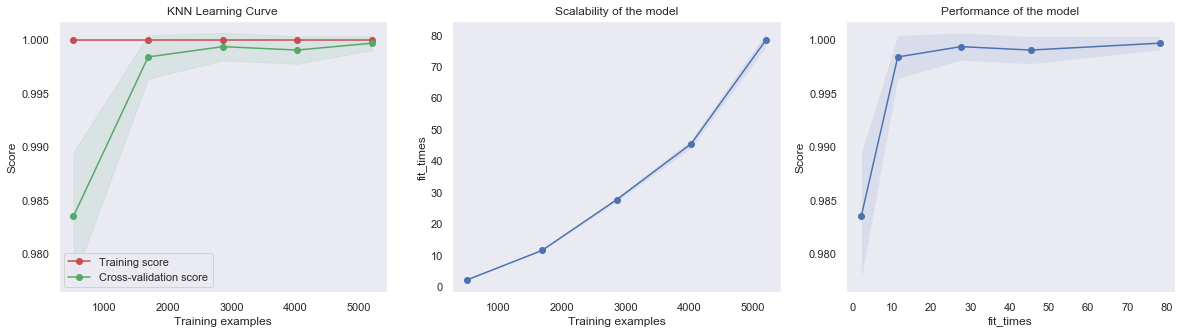

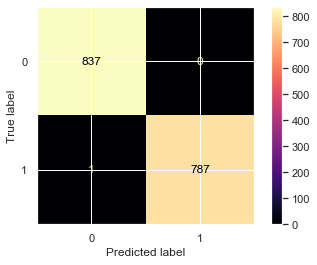

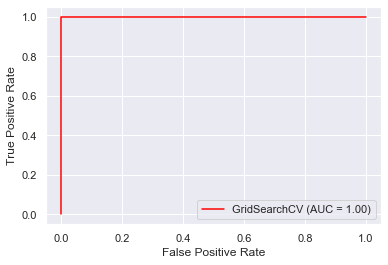

In [43]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Accuracy 100.00% (average over CV test folds)
Best Parameters: {'classifier__max_features': 1}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 13min 4s


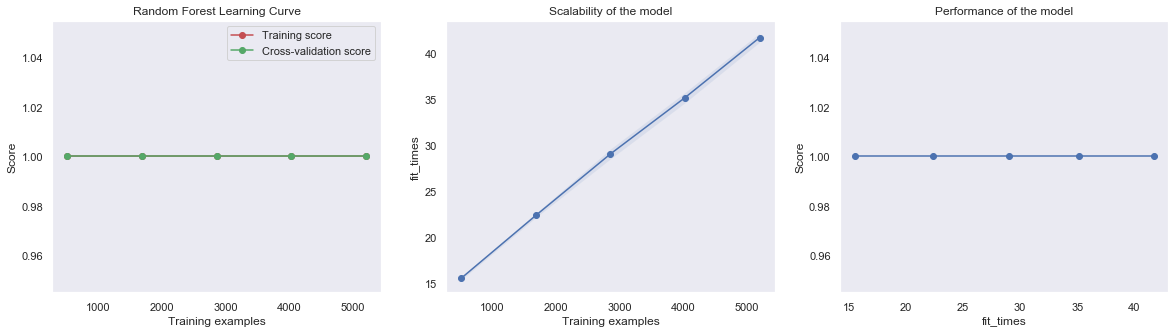

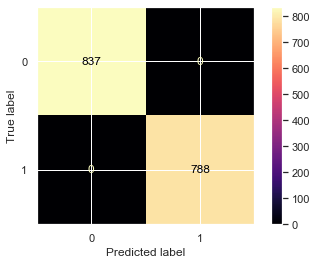

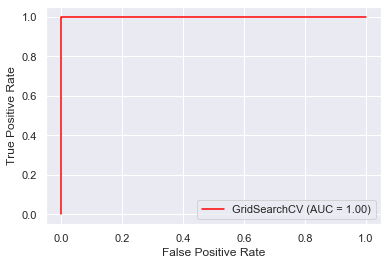

In [44]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'RandomForest Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Accuracy 96.29% (average over CV test folds)
Best Parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l2'}
Training Accuracy: 96.41%
Test Accuracy: 97.11%
Wall time: 19.4 s


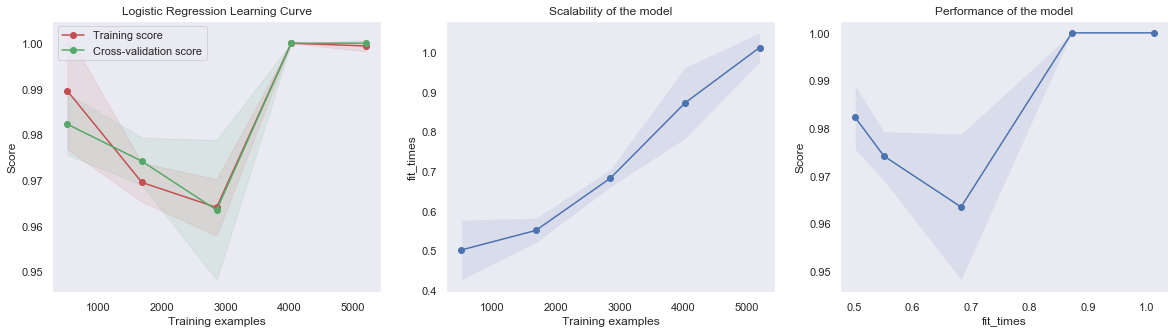

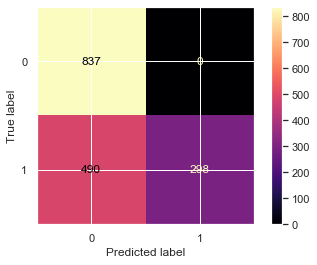

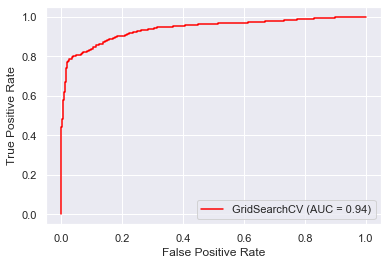

In [45]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Accuracy 99.95% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 9}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 8.63 s


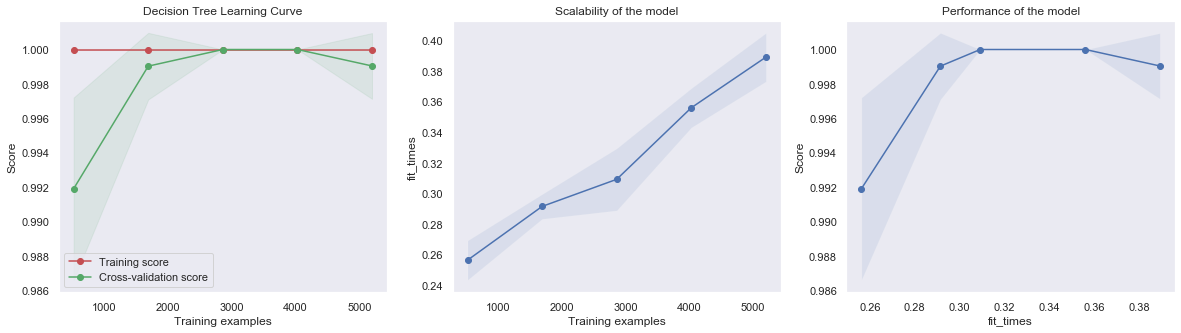

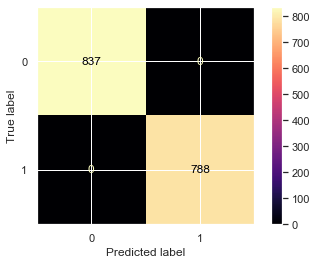

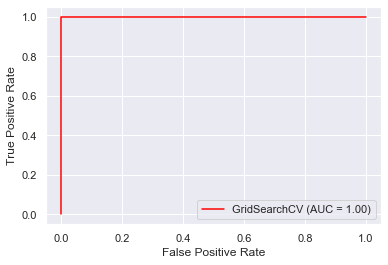

In [46]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'DecisionTree Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [48]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 15, 1, 100, 9, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Accuracy 0.9989228400544798
KNN Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Accuracy 1.0
Random Forest Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Accuracy 0.9579920649019955
Logistic Test Accuracy 0.9624615384615385
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       837
           1       0.97    

## Precision Performance

### Model 'refit' set to precision

In [49]:
train_algo_prec(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 99.88% | outer prec 100.00%
outer fold 1/5 | tuning KNN      | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning DecisionTree | inner prec 99.92% | outer prec 100.00%
outer fold 2/5 | tuning KNN      | inner prec 99.84% | outer prec 100.00%
outer fold 2/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning KNN      | inner prec 99.92% | outer prec 100.00%
outer fold 3/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 4/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
o

Precision 99.91% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 15min 56s


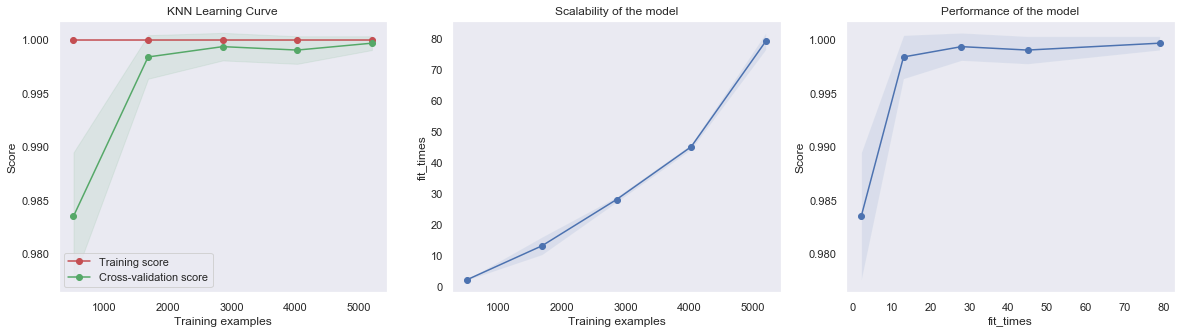

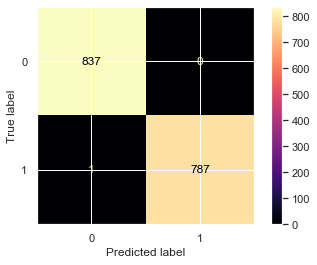

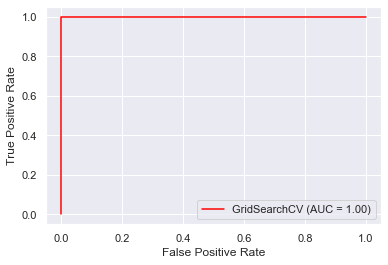

In [50]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Precision 100.00% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 13min 4s


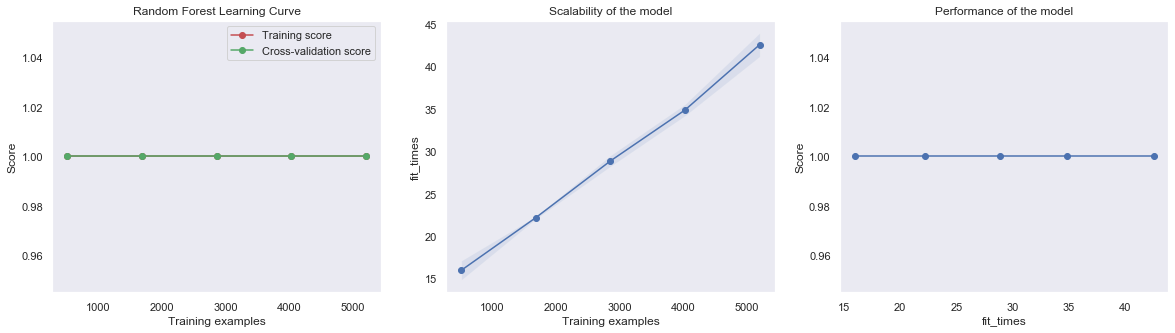

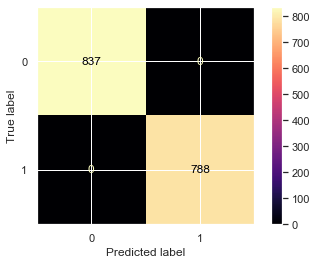

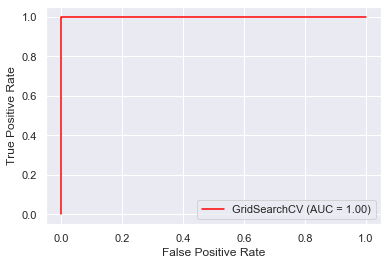

In [51]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Random Forest Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Precision 96.29% (average over CV test folds)
Training Precision: 96.32%
Test Precision: 97.20%
Wall time: 20.3 s


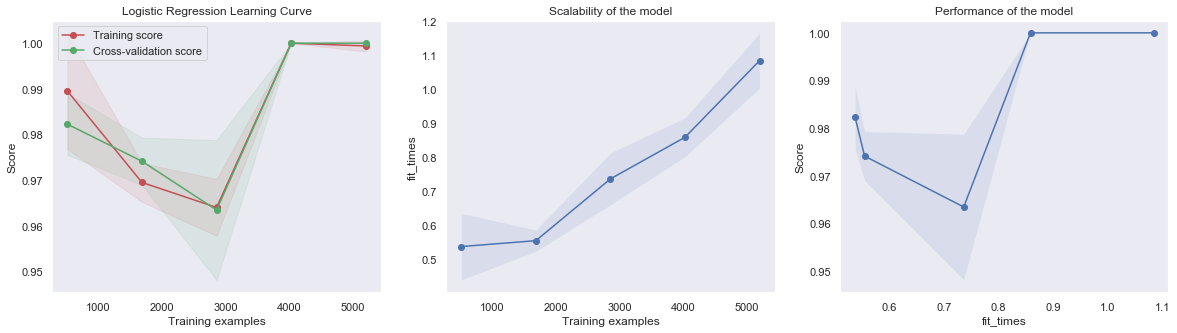

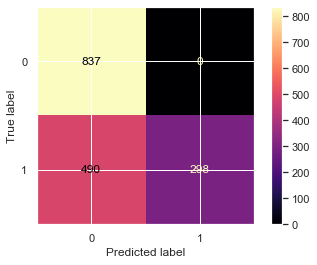

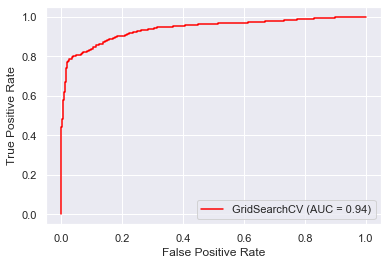

In [52]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Precision 99.95% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 9.09 s


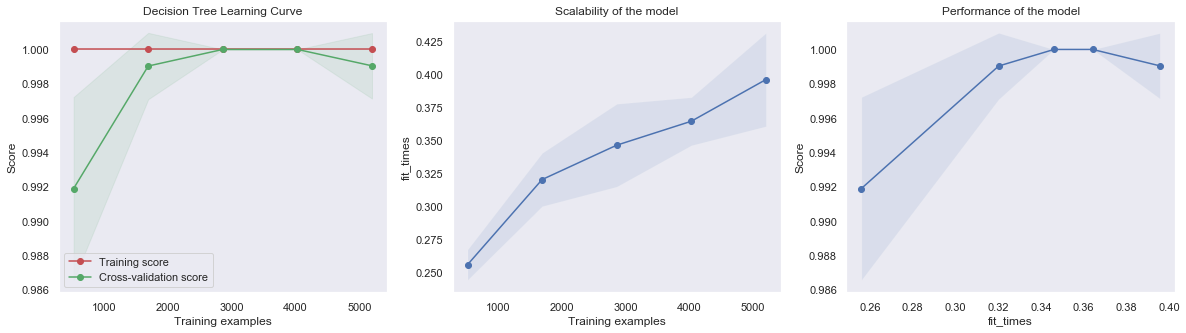

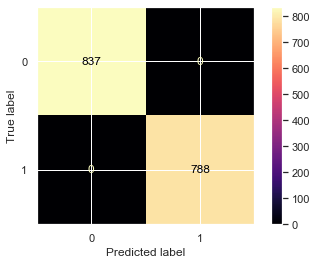

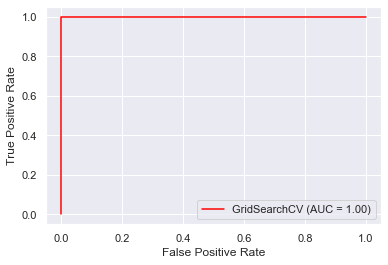

In [53]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Decision Tree Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [79]:
optimized_prec('distance', 15, 1, 1000, 8, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Precision 1.0
KNN Test Precision 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Precision 1.0
Random Forest Test Precision 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Precision 0.9613665389527458
Logistic Test Precision 0.9719029374201787
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       837
           1       0.97      0.97   

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Results: Trial 1

In [76]:
t1_df_accu_dict = pd.DataFrame.from_dict(t1_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_train_dict = pd.DataFrame.from_dict(t1_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_test_dict = pd.DataFrame.from_dict(t1_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_train_dict = pd.DataFrame.from_dict(t1_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_test_dict = pd.DataFrame.from_dict(t1_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [77]:
print("Average Accuracy Across Folds")
print(t1_df_accu_dict)
print("")
print("Training Metric Scores")
print(t1_df_train_dict)
print("")
print("Testing Metric Scores")
print(t1_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t1_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t1_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
RandomForest Accuracy    1.000000
Random Forest Precision  1.000000
DecisionTree Accuracy    0.999538
Decision Tree Precision  0.999538
KNN Accuracy             0.999077
KNN Precision            0.999077
Logistic Accuracy        0.962917
Logistic Precision       0.962917

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
DecisionTree Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    1.000000
Logistic Training Accuracy      0.964148
Logistic Train Precision        0.963200

Testing Metric Scores
                                Score
KNN Test Accuracy            1.000000
RandomForest Test Accuracy   1.000000
DecisionTree Test Accuracy   1.000000
KNN Test Precision           1.000000
RandomForest Test Precision  1.000000
DecisionTree Test Pr

## Visualizations

### Average Accuracies Across Folds

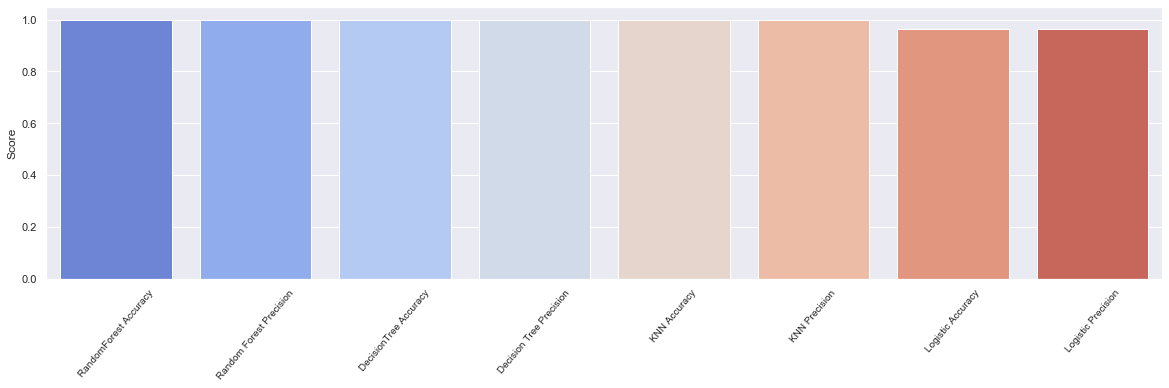

In [57]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_accu_dict.index,y = t1_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

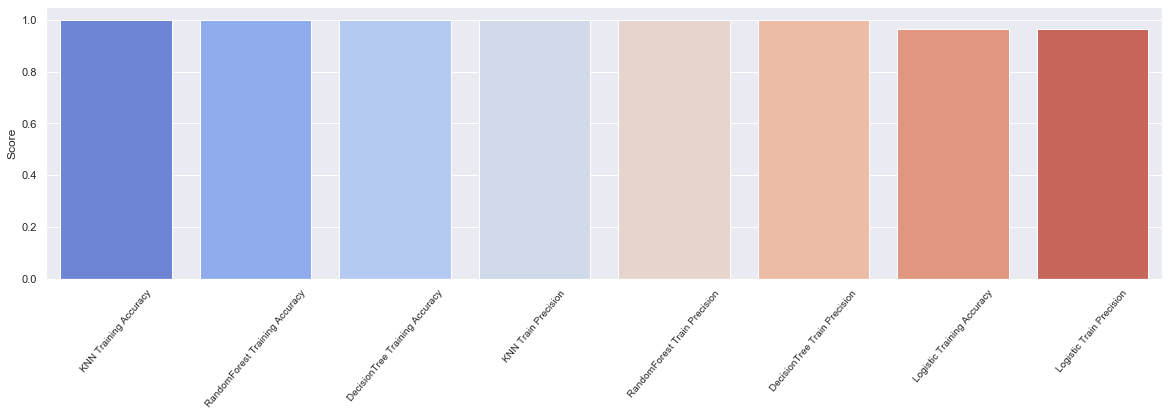

In [58]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_train_dict.index,y = t1_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

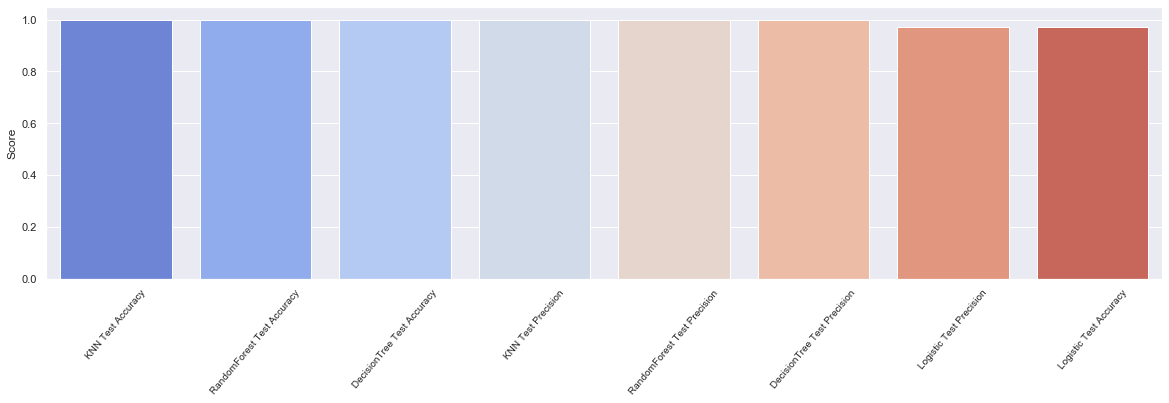

In [59]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_test_dict.index,y = t1_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

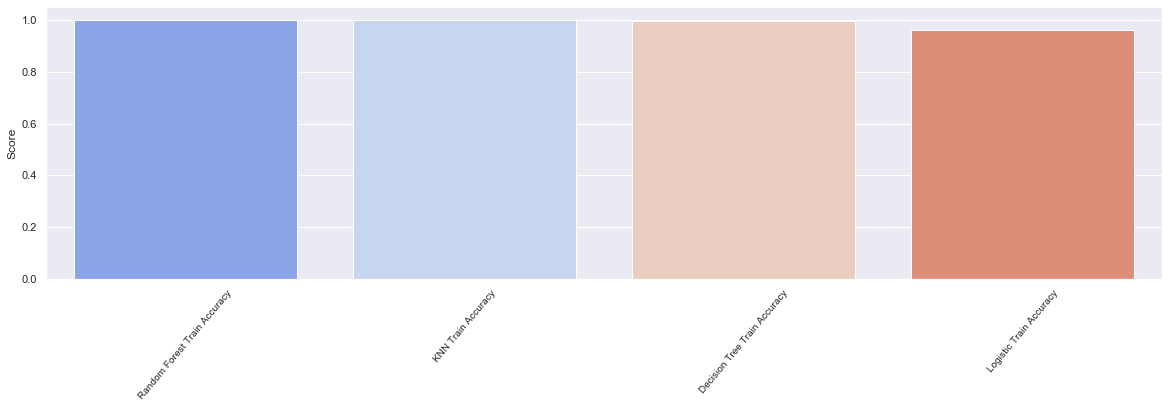

In [60]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_train_dict.index,y = t1_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

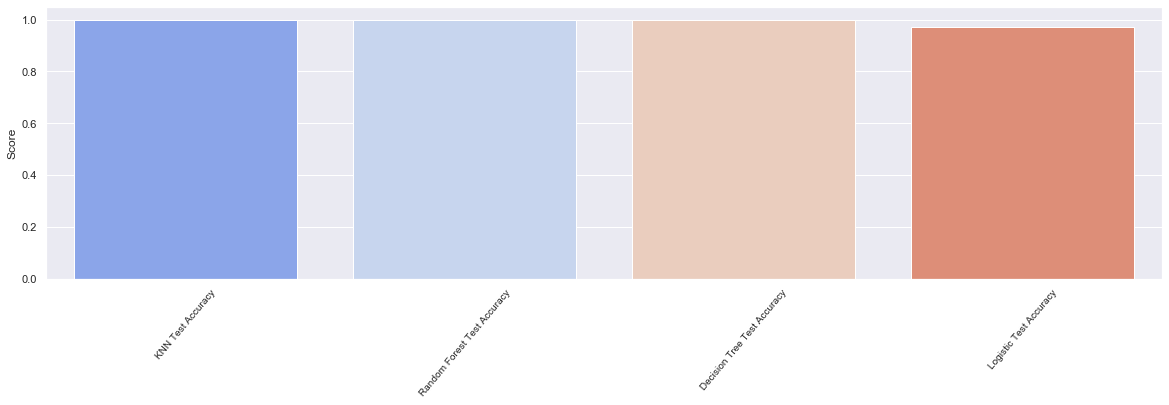

In [61]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_test_dict.index,y = t1_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

## Trial 2

In [62]:
# To store results of models in trial 2
t2_accu_dict = {}

t2_train_dict = {}
t2_test_dict = {}

t2_optimal_train_dict = {}
t2_optimal_test_dict = {}

In [63]:
from sklearn.model_selection import train_test_split
#80/20 split on train and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y,train_size=0.8,random_state=7778)
# feature scaling
minmax = MinMaxScaler()
X2_train = minmax.fit_transform(X2_train)
X2_test = minmax.transform(X2_test)
y2_train  = y2_train.to_numpy()
y2_test = y2_test.to_numpy()
print("Shape of input data X2_train: {} and shape of target variable y2_train: {}".format(X2_train.shape, y2_train.shape))
print("Shape of input data X2_test: {} and shape of target variable y2_test: {}".format(X2_test.shape, y2_test.shape))

Shape of input data X2_train: (6499, 22) and shape of target variable y2_train: (6499,)
Shape of input data X2_test: (1625, 22) and shape of target variable y2_test: (1625,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [64]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 99.08%
outer fold 1/5 | tuning KNN      | inner ACC 100.00% | outer ACC 100.00%
outer fold 1/5 | tuning Logistic | inner ACC 100.00% | outer ACC 66.92%
outer fold 1/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 2/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 100.00%
outer fold 2/5 | tuning KNN      | inner ACC 100.00% | outer ACC 100.00%
outer fold 2/5 | tuning Logistic | inner ACC 100.00% | outer ACC 68.69%
outer fold 2/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 3/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 99.92%
outer fold 3/5 | tuning KNN      | inner ACC 100.00% | outer ACC 99.85%
outer fold 3/5 | tuning Logistic | inner ACC 100.00% | outer ACC 68.31%
outer fold 3/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 4/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 99.46%
outer fold 4/5 | tuning KNN   

Accuracy 99.91% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 15min 54s


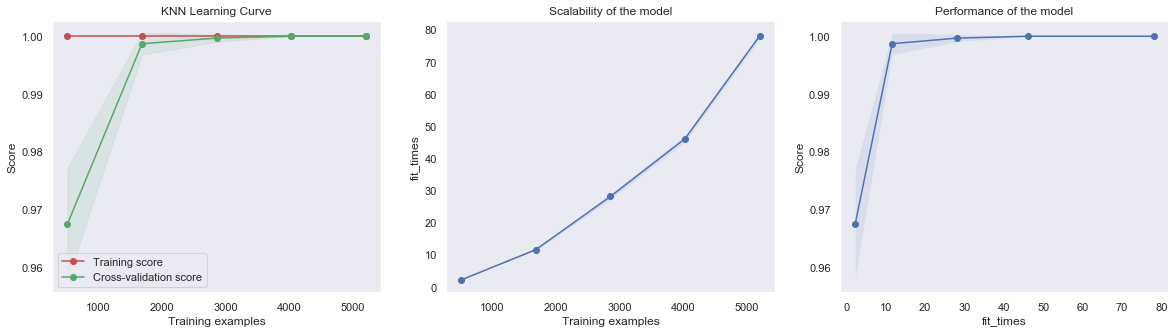

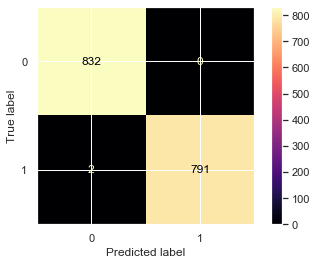

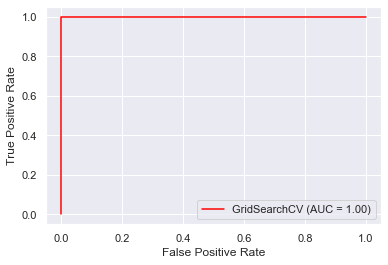

In [65]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

Accuracy 100.00% (average over CV test folds)
Best Parameters: {'classifier__max_features': 1}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 13min 2s


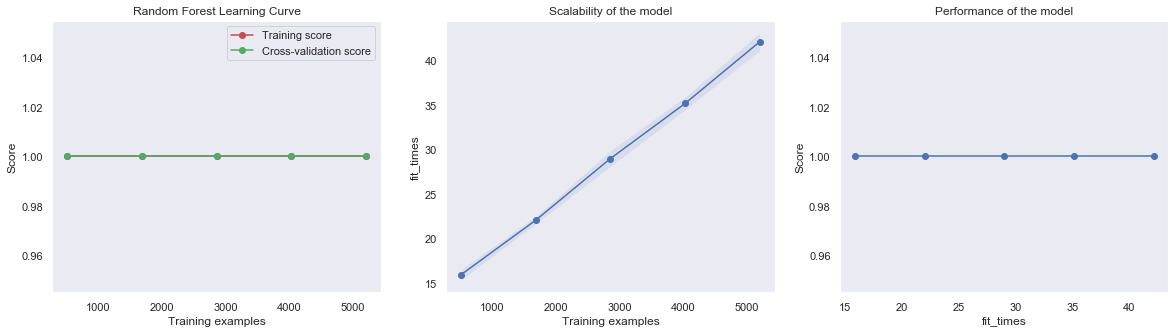

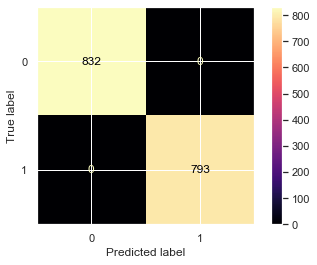

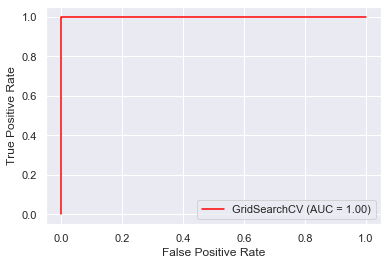

In [66]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'RandomForest Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

Accuracy 96.83% (average over CV test folds)
Best Parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l2'}
Training Accuracy: 96.97%
Test Accuracy: 96.74%
Wall time: 19.6 s


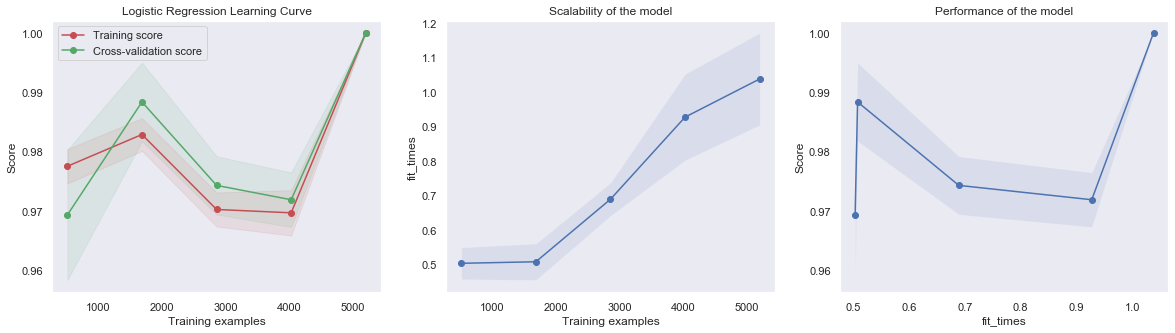

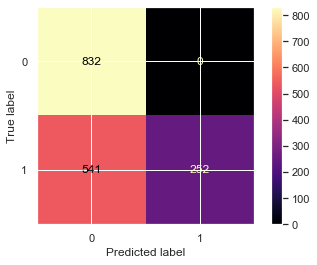

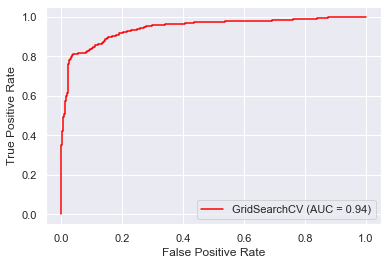

In [67]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

Accuracy 100.00% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 7}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 8.58 s


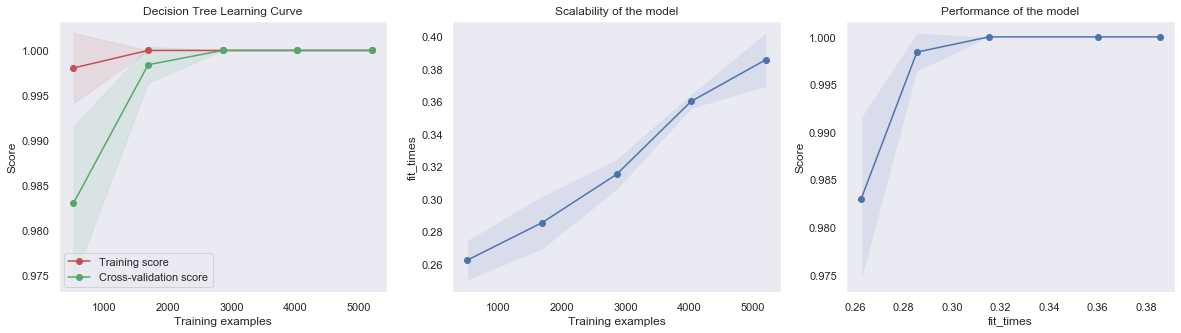

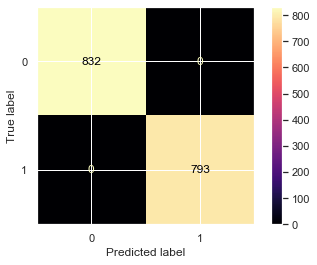

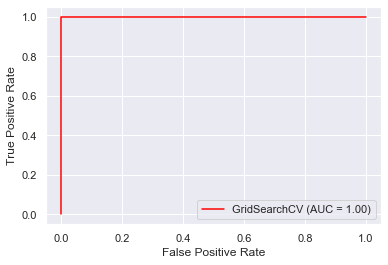

In [68]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'DecisionTree Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [69]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 15, 1, 1000, 8, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Accuracy 0.9992306507964706
KNN Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Accuracy 1.0
Random Forest Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Accuracy 0.9679945520222656
Logistic Test Accuracy 0.9667692307692307
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       832
           1       0.97    

## Precision Performance

### Model 'refit' set to precision

In [70]:
train_algo_prec(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning KNN      | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning KNN      | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning KNN      | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning Logistic | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 4/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.0

Precision 99.91% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 16min 1s


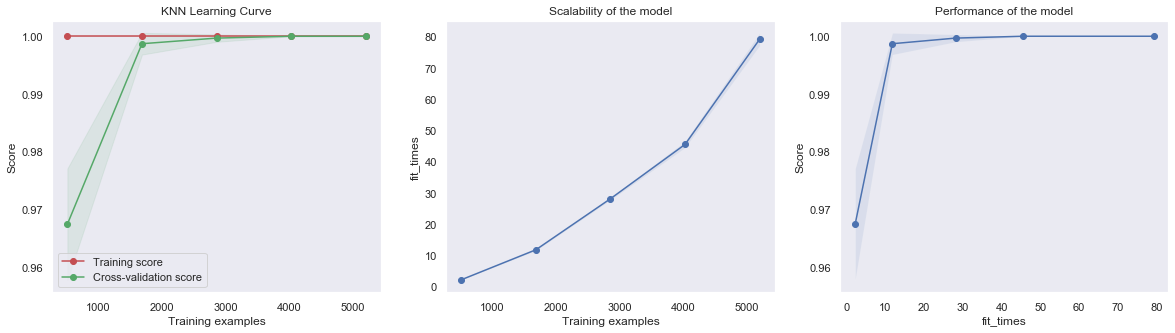

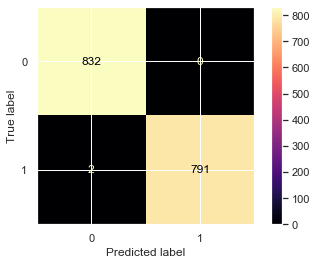

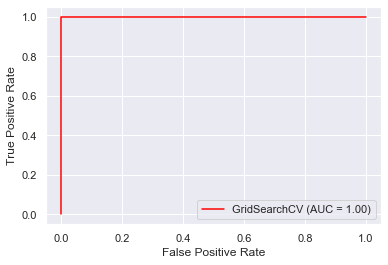

In [71]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

Precision 100.00% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 14min 40s


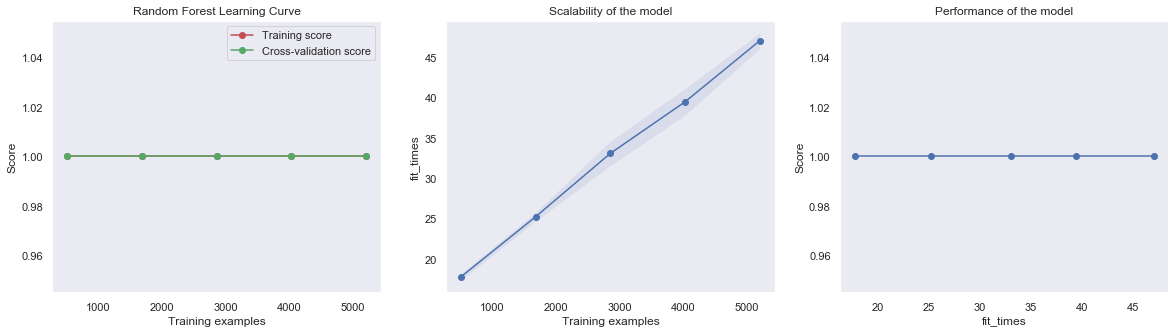

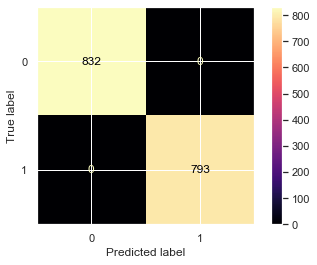

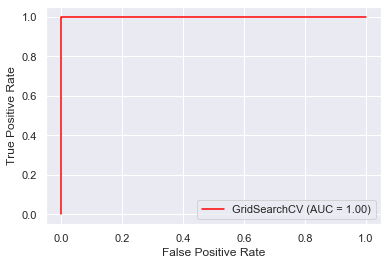

In [72]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Random Forest Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

Precision 96.83% (average over CV test folds)
Training Precision: 96.83%
Test Precision: 96.84%
Wall time: 21.5 s


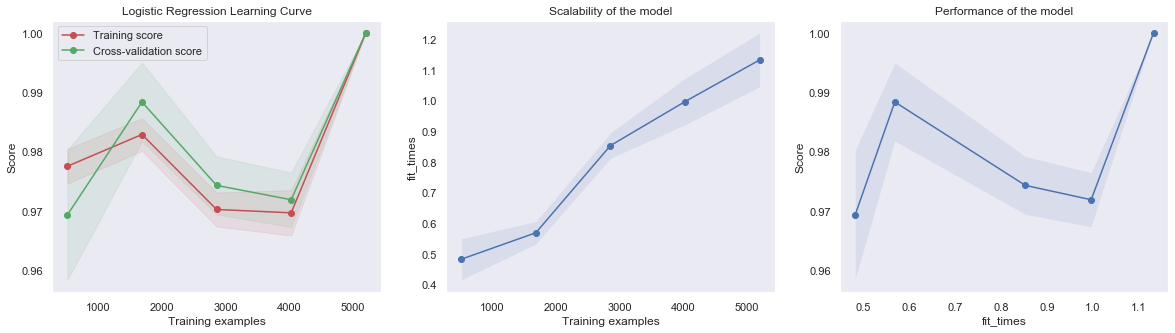

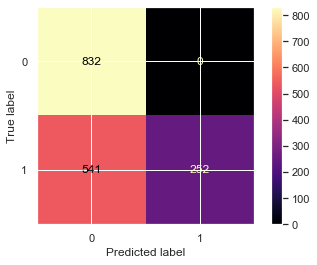

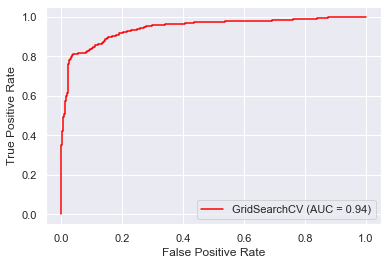

In [73]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

Precision 100.00% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 8.74 s


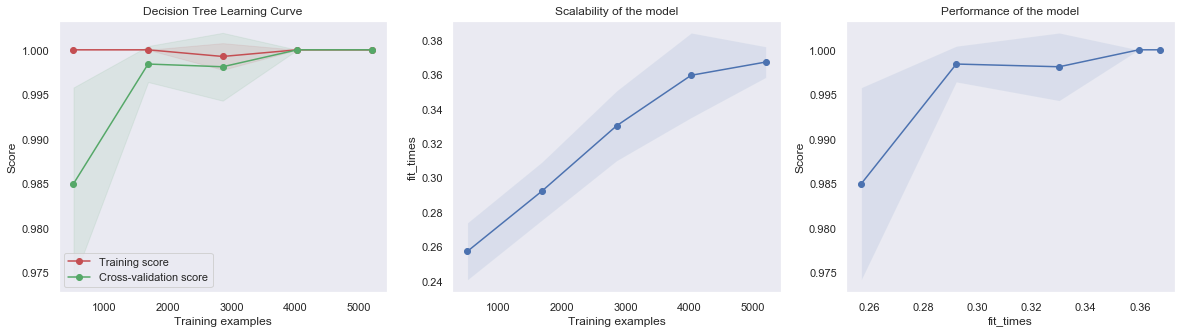

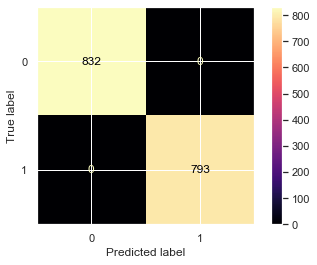

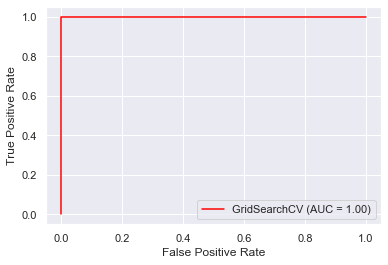

In [74]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Decision Tree Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [80]:
optimized_prec('distance', 15, 1, 1000, 8, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Precision 1.0
KNN Test Precision 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Precision 1.0
Random Forest Test Precision 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Precision 0.9682895579756566
Logistic Test Precision 0.9683143219264893
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       832
           1       0.97      0.96   

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Results: Trial 2

In [81]:
t2_df_accu_dict = pd.DataFrame.from_dict(t2_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_train_dict = pd.DataFrame.from_dict(t2_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_test_dict = pd.DataFrame.from_dict(t2_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_train_dict = pd.DataFrame.from_dict(t2_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_test_dict = pd.DataFrame.from_dict(t2_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [82]:
print("Average Accuracy Across Folds")
print(t2_df_accu_dict)
print("")
print("Training Metric Scores")
print(t2_df_train_dict)
print("")
print("Testing Metric Scores")
print(t2_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t2_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t2_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
RandomForest Accuracy    1.000000
DecisionTree Accuracy    1.000000
Random Forest Precision  1.000000
Decision Tree Precision  1.000000
KNN Accuracy             0.999077
KNN Precision            0.999077
Logistic Accuracy        0.968302
Logistic Precision       0.968302

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
DecisionTree Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    1.000000
Logistic Training Accuracy      0.969688
Logistic Train Precision        0.968310

Testing Metric Scores
                                Score
KNN Test Accuracy            1.000000
RandomForest Test Accuracy   1.000000
DecisionTree Test Accuracy   1.000000
KNN Test Precision           1.000000
RandomForest Test Precision  1.000000
DecisionTree Test Pr

## Visualizations

### Average Accuracies Across Folds

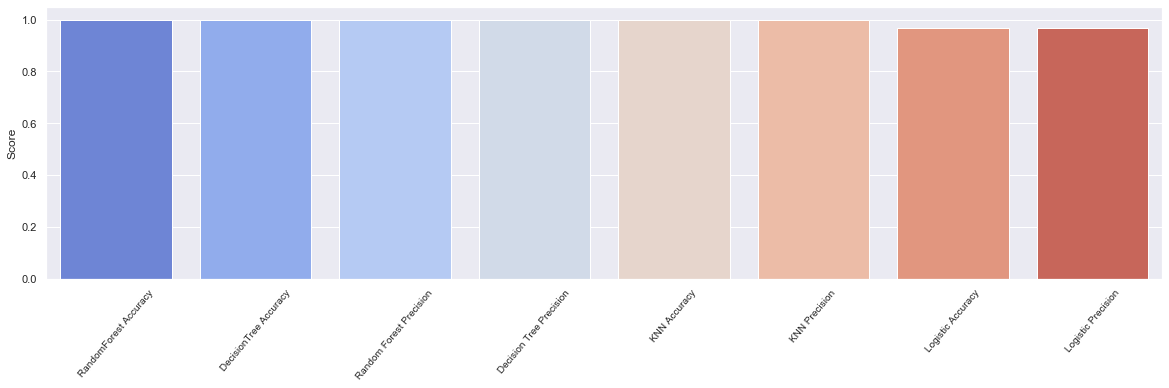

In [83]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_accu_dict.index,y = t2_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

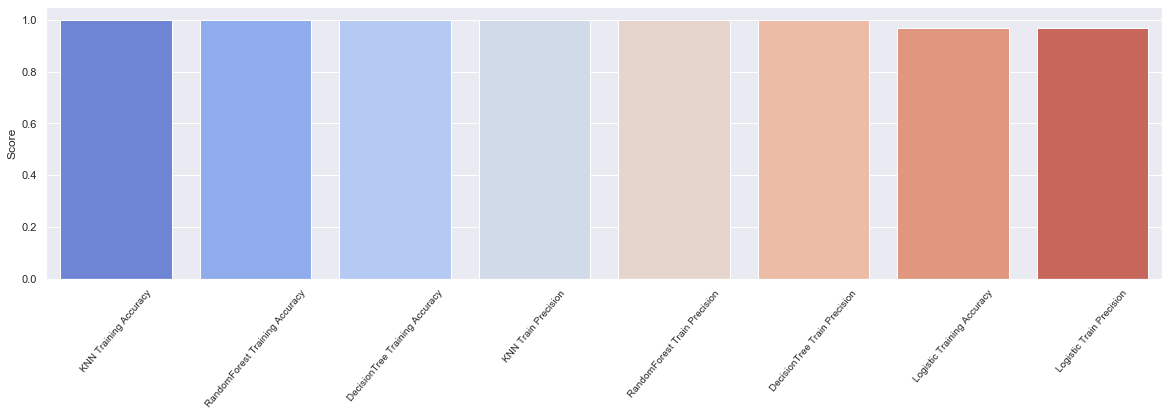

In [84]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_train_dict.index,y = t2_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

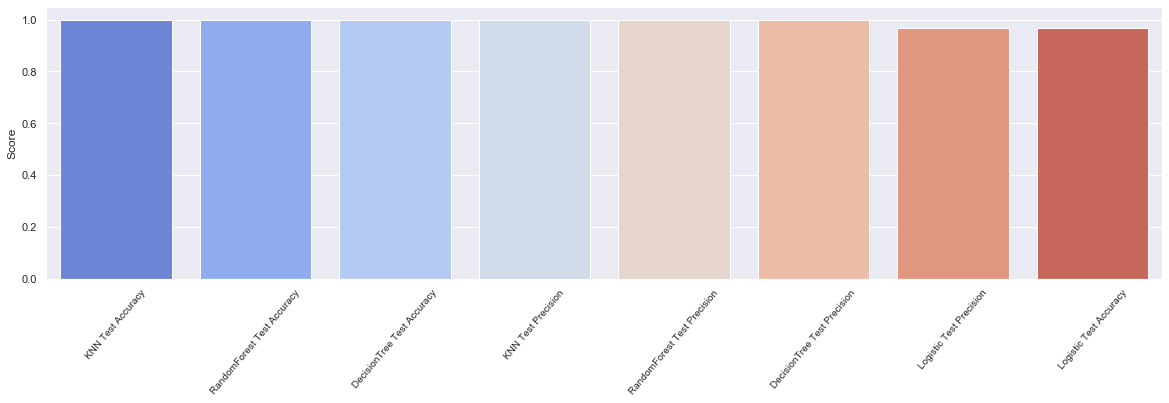

In [85]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_test_dict.index,y = t2_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

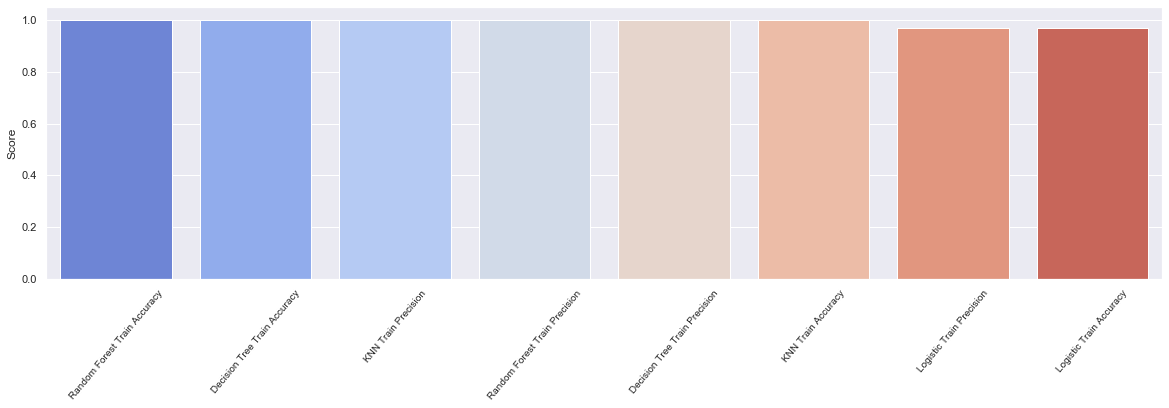

In [86]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_train_dict.index,y = t2_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

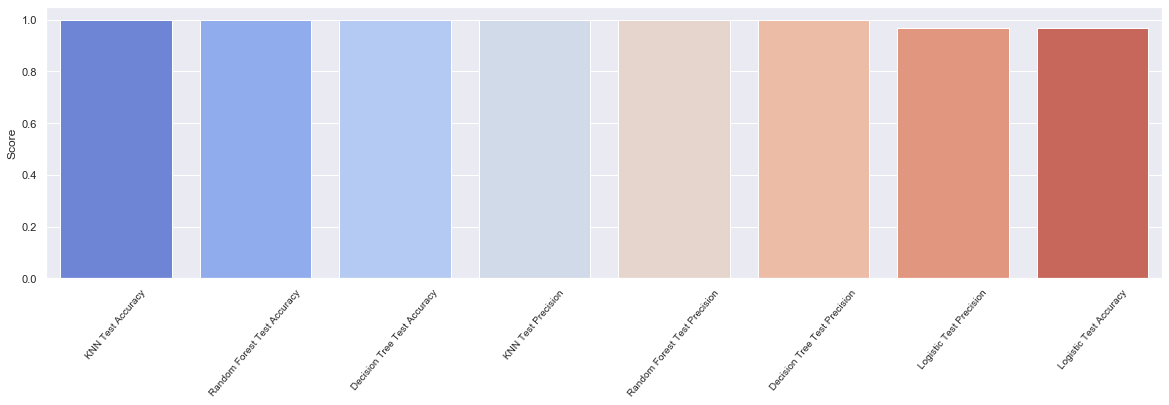

In [87]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_test_dict.index,y = t2_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Trial 3

In [88]:
# To store results of models in trial 3
t3_accu_dict = {}

t3_train_dict = {}
t3_test_dict = {}

t3_optimal_train_dict = {}
t3_optimal_test_dict = {}

In [89]:
from sklearn.model_selection import train_test_split
#80/20 split on train and test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y,train_size=0.8,random_state=1865)
# feature scaling
minmax = MinMaxScaler()
X3_train = minmax.fit_transform(X3_train)
X3_test = minmax.transform(X3_test)
y3_train  = y3_train.to_numpy()
y3_test = y3_test.to_numpy()
print("Shape of input data X3_train: {} and shape of target variable y3_train: {}".format(X3_train.shape, y3_train.shape))
print("Shape of input data X3_test: {} and shape of target variable y3_test: {}".format(X3_test.shape, y3_test.shape))

Shape of input data X3_train: (6499, 22) and shape of target variable y3_train: (6499,)
Shape of input data X3_test: (1625, 22) and shape of target variable y3_test: (1625,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [90]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 99.46%
outer fold 1/5 | tuning KNN      | inner ACC 99.92% | outer ACC 100.00%
outer fold 1/5 | tuning Logistic | inner ACC 99.59% | outer ACC 76.38%
outer fold 1/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 2/5 | tuning DecisionTree | inner ACC 99.96% | outer ACC 100.00%
outer fold 2/5 | tuning KNN      | inner ACC 99.96% | outer ACC 99.85%
outer fold 2/5 | tuning Logistic | inner ACC 99.60% | outer ACC 74.62%
outer fold 2/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 3/5 | tuning DecisionTree | inner ACC 100.00% | outer ACC 99.54%
outer fold 3/5 | tuning KNN      | inner ACC 99.96% | outer ACC 99.92%
outer fold 3/5 | tuning Logistic | inner ACC 99.52% | outer ACC 74.92%
outer fold 3/5 | tuning RandomForest | inner ACC 100.00% | outer ACC 100.00%
outer fold 4/5 | tuning DecisionTree | inner ACC 99.92% | outer ACC 100.00%
outer fold 4/5 | tuning KNN      | inn

Accuracy 99.91% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 18min 6s


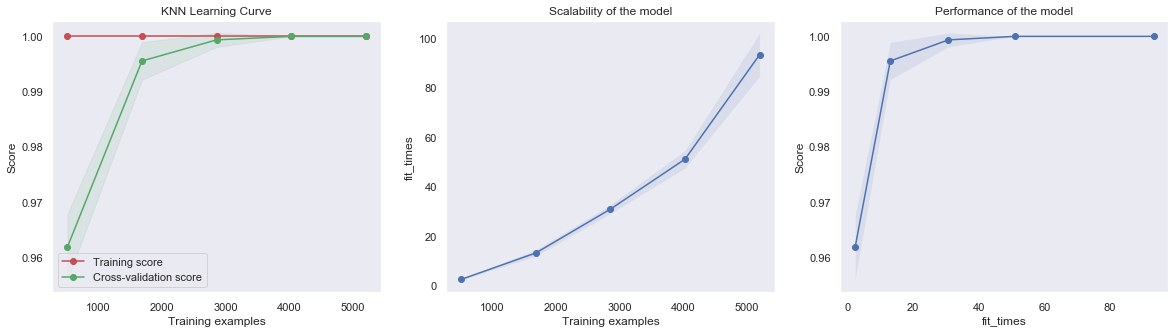

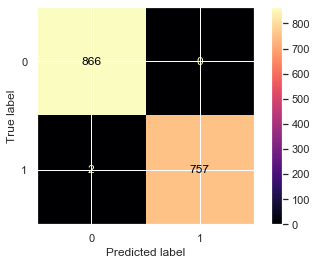

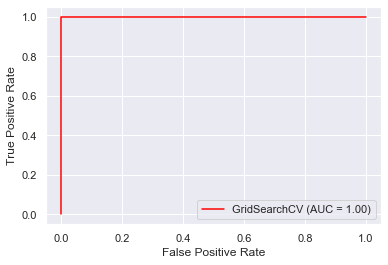

In [91]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Accuracy 100.00% (average over CV test folds)
Best Parameters: {'classifier__max_features': 1}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 14min 38s


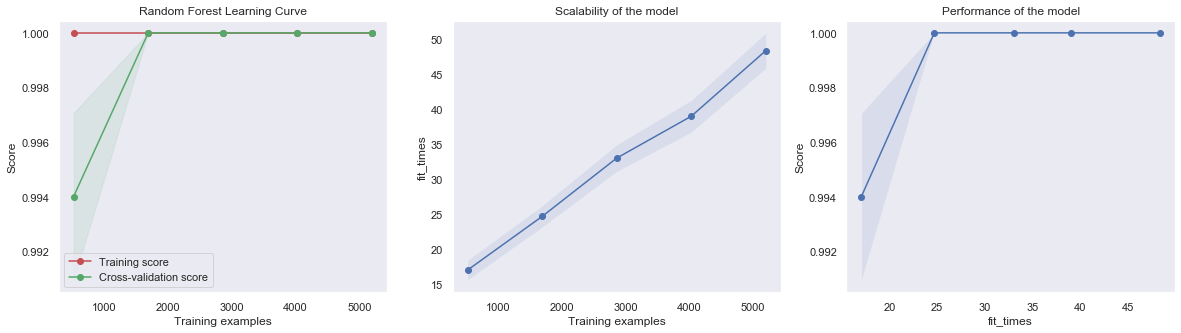

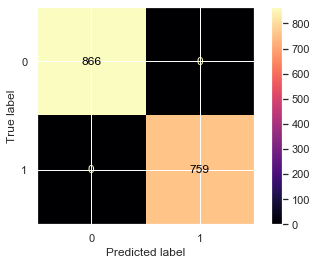

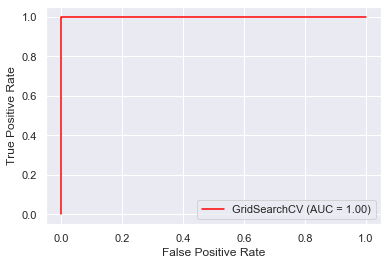

In [92]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'RandomForest Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Accuracy 96.49% (average over CV test folds)
Best Parameters: {'classifier__C': 1000.0, 'classifier__penalty': 'l2'}
Training Accuracy: 96.58%
Test Accuracy: 95.94%
Wall time: 21.3 s


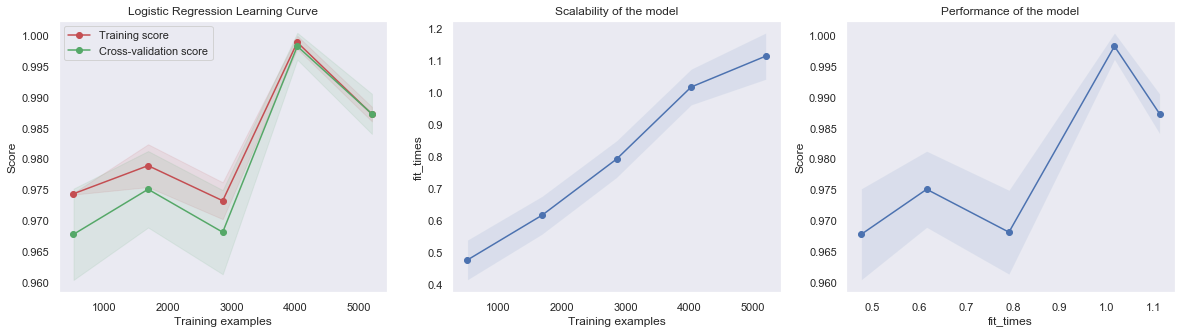

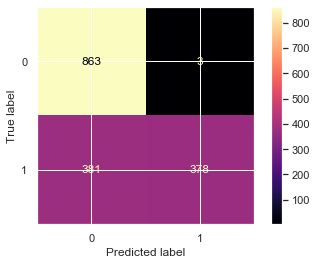

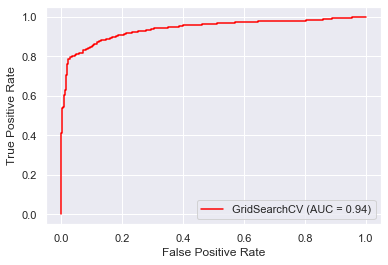

In [93]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Accuracy 100.00% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 8}
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Wall time: 9.04 s


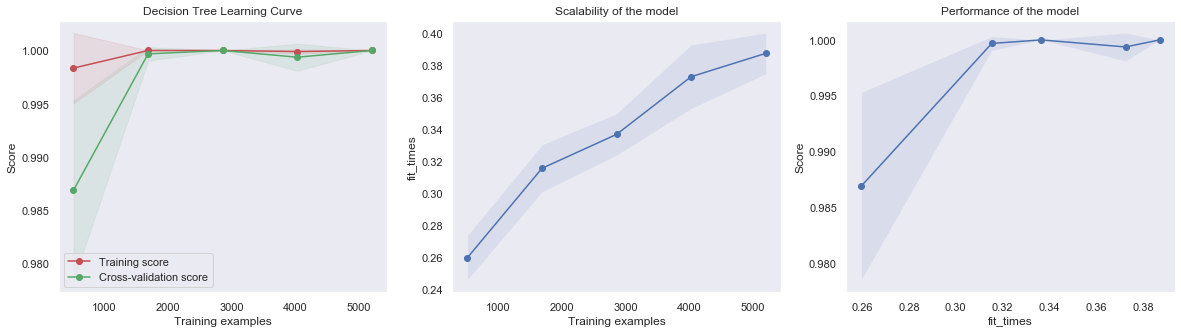

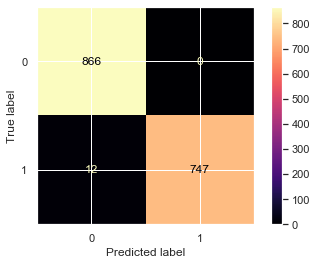

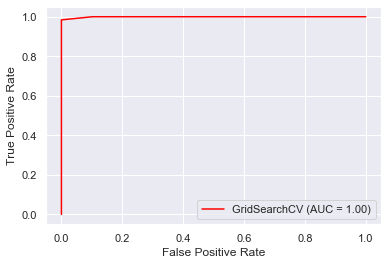

In [94]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'DecisionTree Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [95]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 15, 1, 1000, 6, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Accuracy 0.9989229584887784
KNN Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Accuracy 1.0
Random Forest Test Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Accuracy 0.9643031918043465
Logistic Test Accuracy 0.9593846153846154
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       866
           1       0.95    

## Precision Performance

### Model 'refit' to precision

In [96]:
train_algo_prec(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 1/5 | tuning KNN      | inner prec 99.92% | outer prec 100.00%
outer fold 1/5 | tuning Logistic | inner prec 99.59% | outer prec 99.39%
outer fold 1/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 2/5 | tuning DecisionTree | inner prec 99.96% | outer prec 100.00%
outer fold 2/5 | tuning KNN      | inner prec 99.96% | outer prec 100.00%
outer fold 2/5 | tuning Logistic | inner prec 99.60% | outer prec 99.03%
outer fold 2/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning DecisionTree | inner prec 100.00% | outer prec 100.00%
outer fold 3/5 | tuning KNN      | inner prec 99.96% | outer prec 100.00%
outer fold 3/5 | tuning Logistic | inner prec 99.52% | outer prec 98.11%
outer fold 3/5 | tuning RandomForest | inner prec 100.00% | outer prec 100.00%
outer fold 4/5 | tuning DecisionTree | inner prec 99.92% | outer prec 100.00%
outer fo

Precision 99.91% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 16min 47s


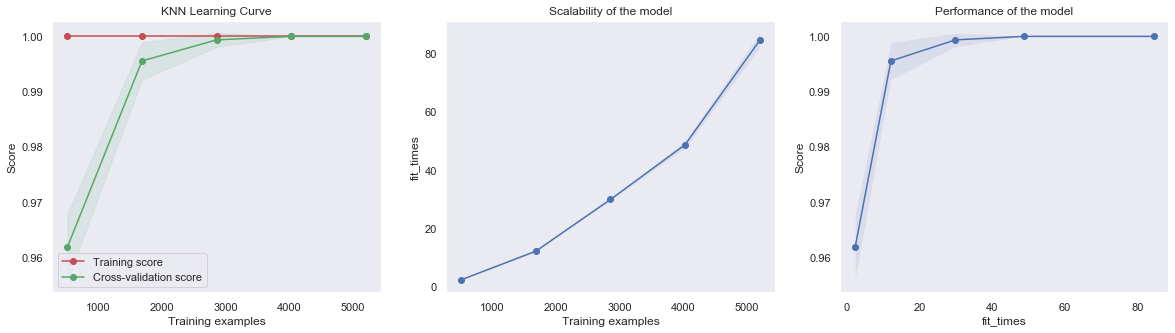

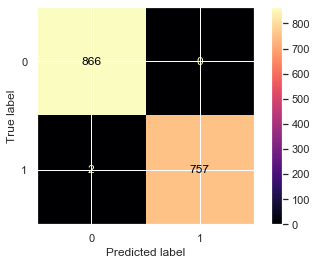

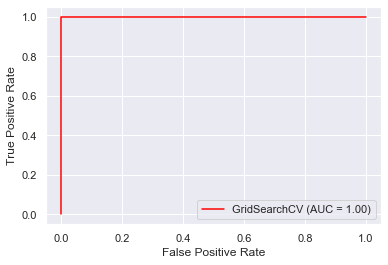

In [97]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Precision 100.00% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 13min 2s


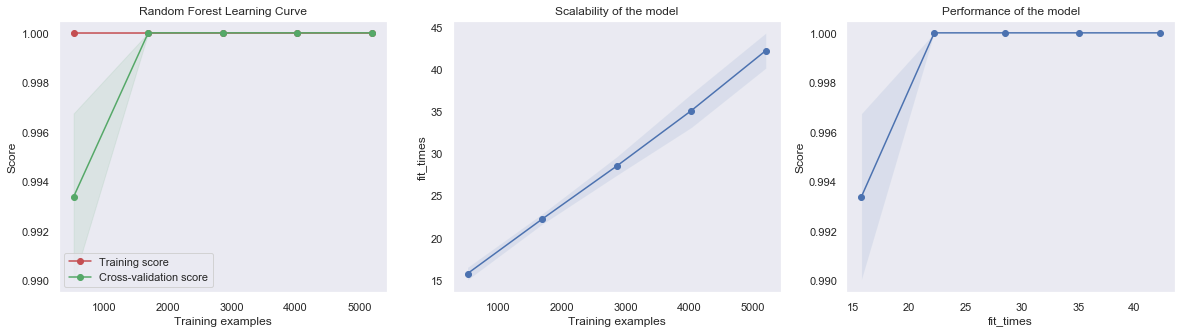

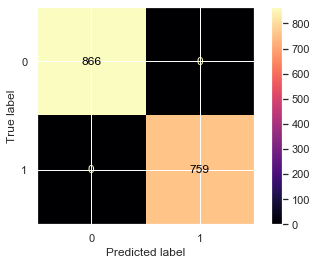

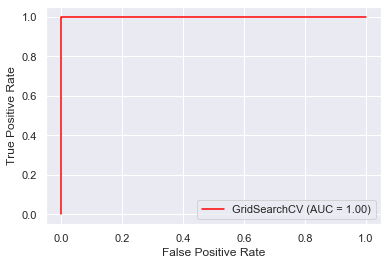

In [98]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Random Forest Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Precision 96.49% (average over CV test folds)
Training Precision: 96.34%
Test Precision: 95.29%
Wall time: 22.4 s


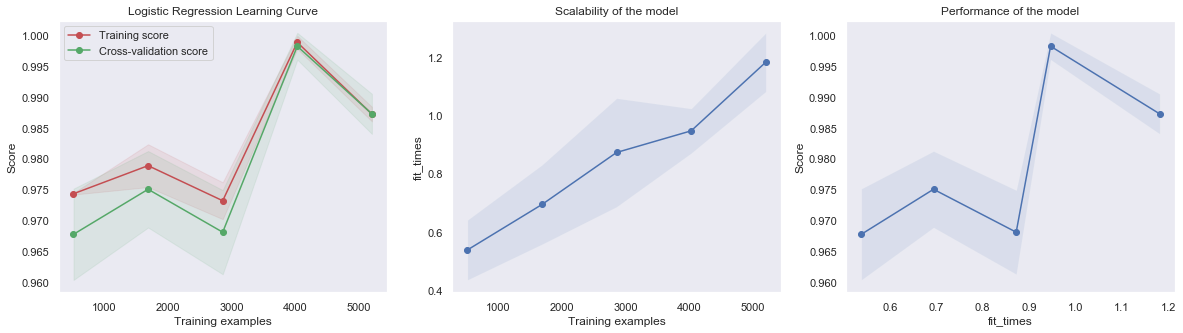

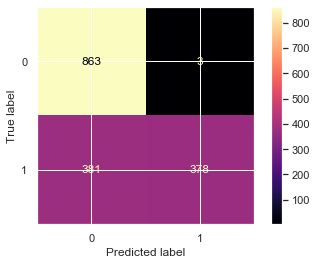

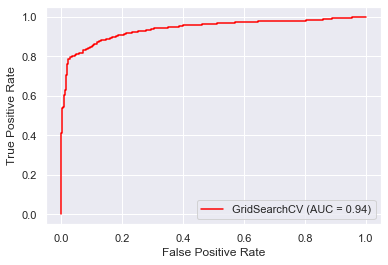

In [99]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Precision 100.00% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 100.00%
Wall time: 9.19 s


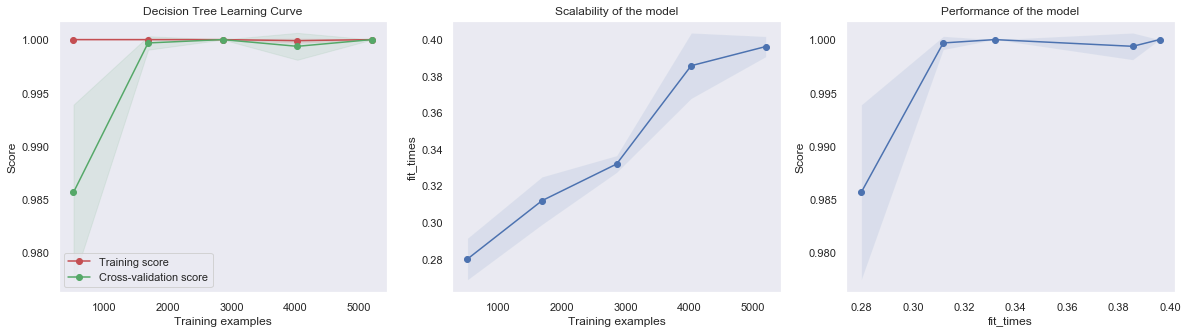

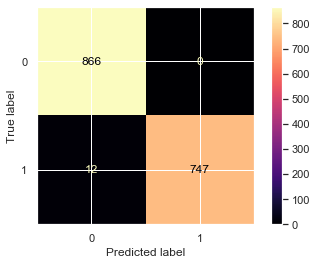

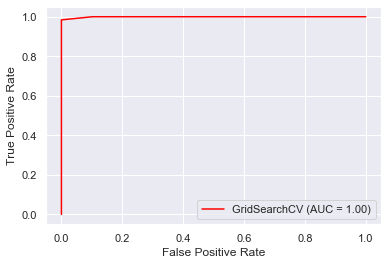

In [100]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Decision Tree Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [101]:
optimized_prec('uniform', 15, 1, 1000, 6, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Precision 1.0
KNN Test Precision 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       866
           1       1.00      0.99      1.00       759

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Train Precision 1.0
Random Forest Test Precision 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Logistic Train Precision 0.9630798359103818
Logistic Test Precision 0.9520103761348897
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       866
           1       0.95      0.97   

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Results: Trial 3

In [102]:
t3_df_accu_dict = pd.DataFrame.from_dict(t3_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_train_dict = pd.DataFrame.from_dict(t3_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_test_dict = pd.DataFrame.from_dict(t3_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_train_dict = pd.DataFrame.from_dict(t3_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_test_dict = pd.DataFrame.from_dict(t3_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [103]:
print("Average Accuracy Across Folds")
print(t3_df_accu_dict)
print("")
print("Training Metric Scores")
print(t3_df_train_dict)
print("")
print("Testing Metric Scores")
print(t3_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t3_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t3_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
RandomForest Accuracy    1.000000
DecisionTree Accuracy    1.000000
Random Forest Precision  1.000000
Decision Tree Precision  1.000000
KNN Accuracy             0.999077
KNN Precision            0.999077
Logistic Accuracy        0.964919
Logistic Precision       0.964919

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
DecisionTree Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    1.000000
Logistic Training Accuracy      0.965841
Logistic Train Precision        0.963372

Testing Metric Scores
                                Score
KNN Test Accuracy            1.000000
RandomForest Test Accuracy   1.000000
DecisionTree Test Accuracy   1.000000
KNN Test Precision           1.000000
RandomForest Test Precision  1.000000
DecisionTree Test Pr

## Visualizations

### Average Accuracies Across Folds

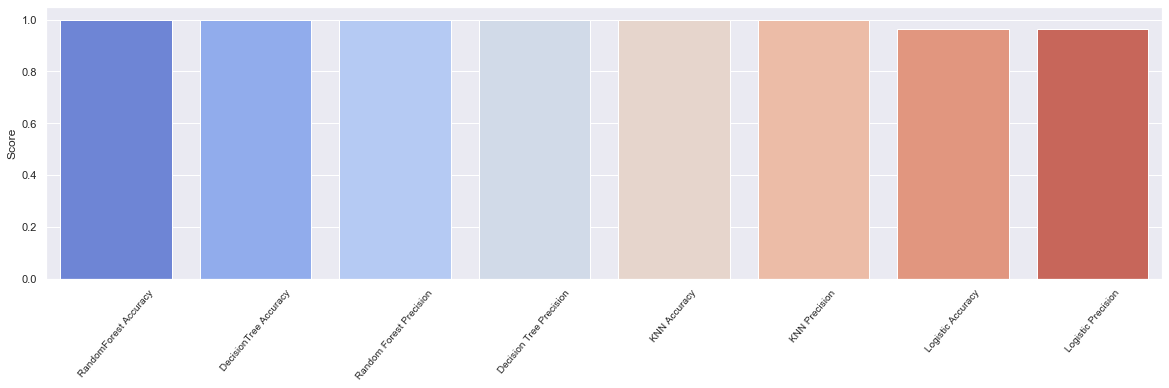

In [104]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_accu_dict.index,y = t3_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

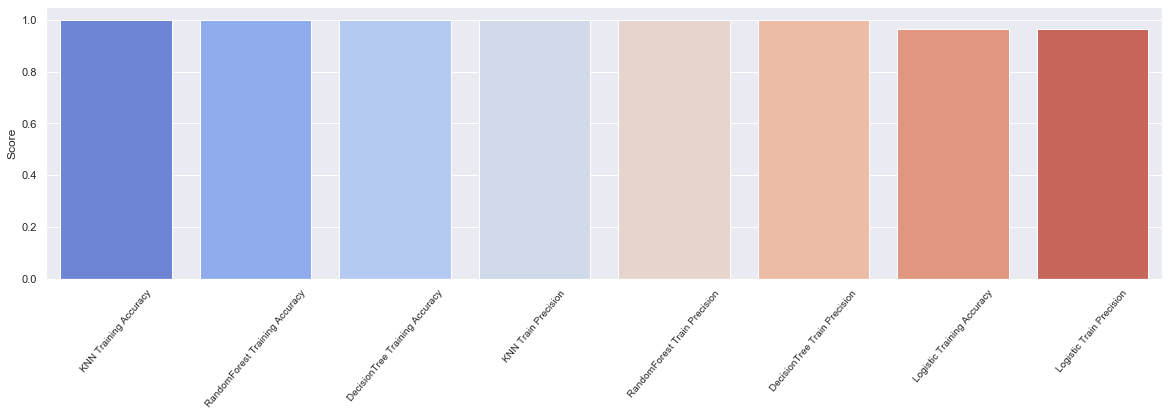

In [105]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_train_dict.index,y = t3_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

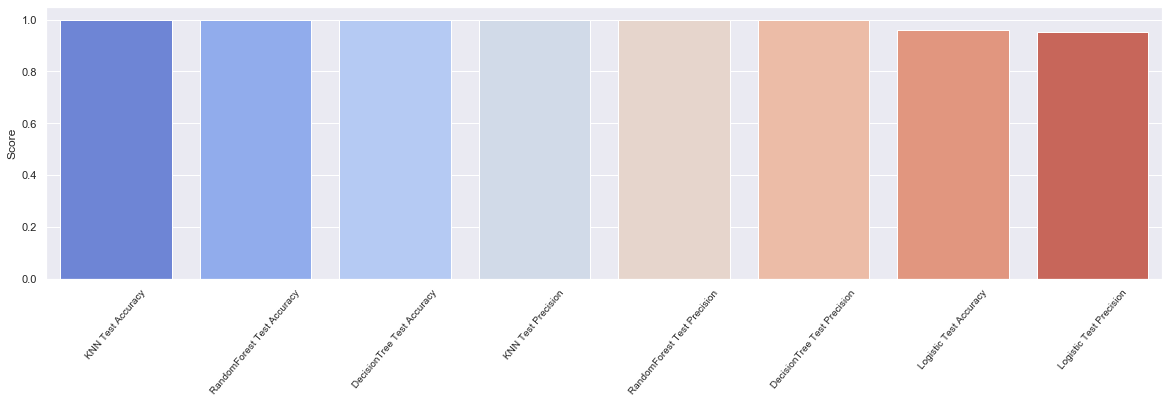

In [106]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_test_dict.index,y = t3_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

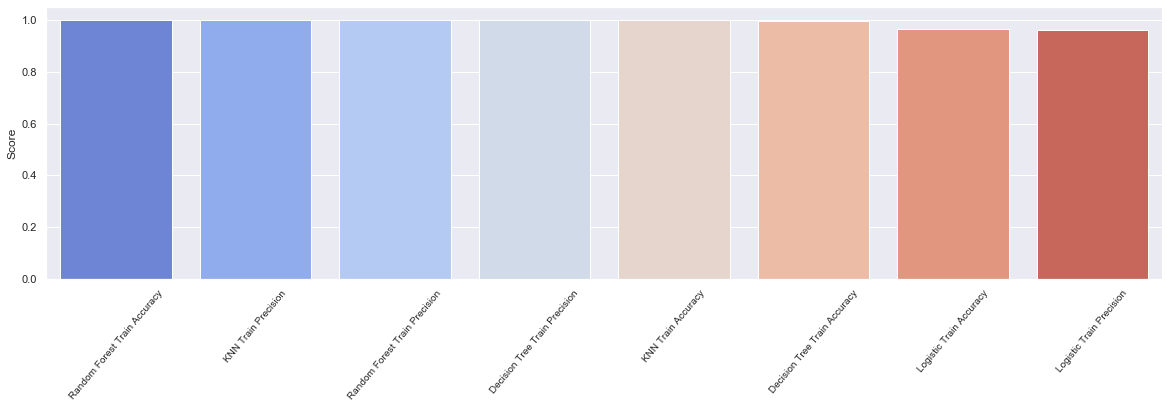

In [107]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_train_dict.index,y = t3_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

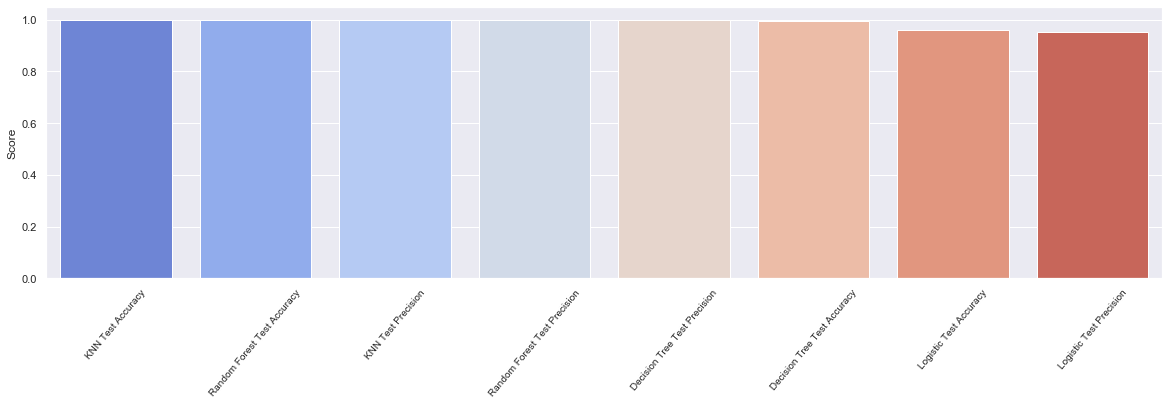

In [108]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_test_dict.index,y = t3_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Results: All Trials

## Averaging Results Across Trials

### Average Accuracy 

In [109]:
# taking the average across all 3 trials for average accuracy across 5 folds
df_avearge_accuracy = pd.concat([t1_df_accu_dict, t2_df_accu_dict, t2_df_accu_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_accuracy

Score
Random Forest Precision  1.000000
RandomForest Accuracy    1.000000
Decision Tree Precision  0.999846
DecisionTree Accuracy    0.999846
KNN Accuracy             0.999077
KNN Precision            0.999077
Logistic Accuracy        0.966507
Logistic Precision       0.966507

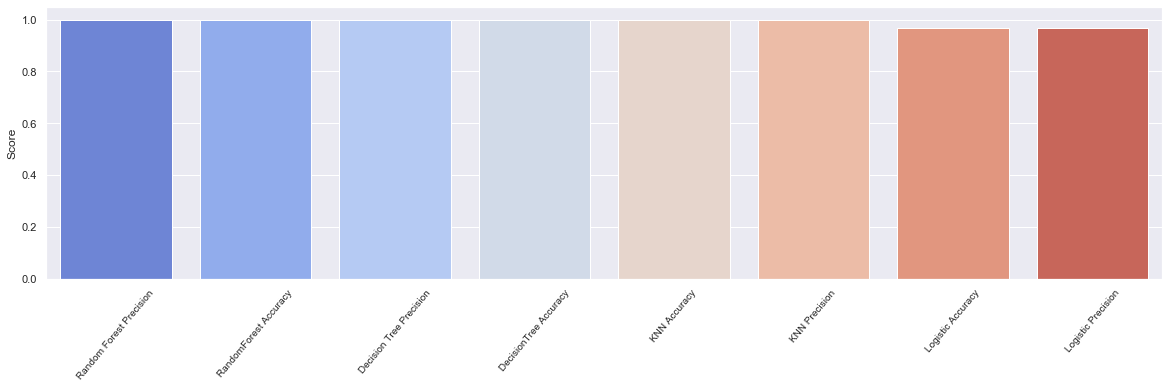

In [110]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_accuracy.index,y = df_avearge_accuracy.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_accuracy.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores

In [111]:
df_avearge_train = pd.concat([t1_df_train_dict, t2_df_train_dict, t3_df_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_train

Score
DecisionTree Train Precision    1.000000
DecisionTree Training Accuracy  1.000000
KNN Train Precision             1.000000
KNN Training Accuracy           1.000000
RandomForest Train Precision    1.000000
RandomForest Training Accuracy  1.000000
Logistic Training Accuracy      0.966559
Logistic Train Precision        0.964961

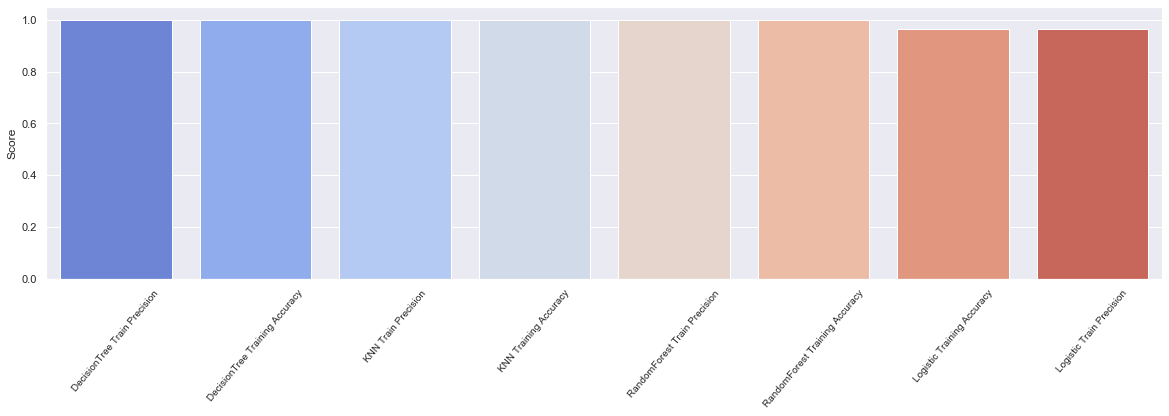

In [112]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_train.index,y = df_avearge_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores

In [113]:
df_avearge_test = pd.concat([t1_df_test_dict, t2_df_test_dict, t3_df_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_test

Score
DecisionTree Test Accuracy   1.000000
DecisionTree Test Precision  1.000000
KNN Test Accuracy            1.000000
KNN Test Precision           1.000000
RandomForest Test Accuracy   1.000000
RandomForest Test Precision  1.000000
Logistic Test Accuracy       0.965949
Logistic Test Precision      0.964423

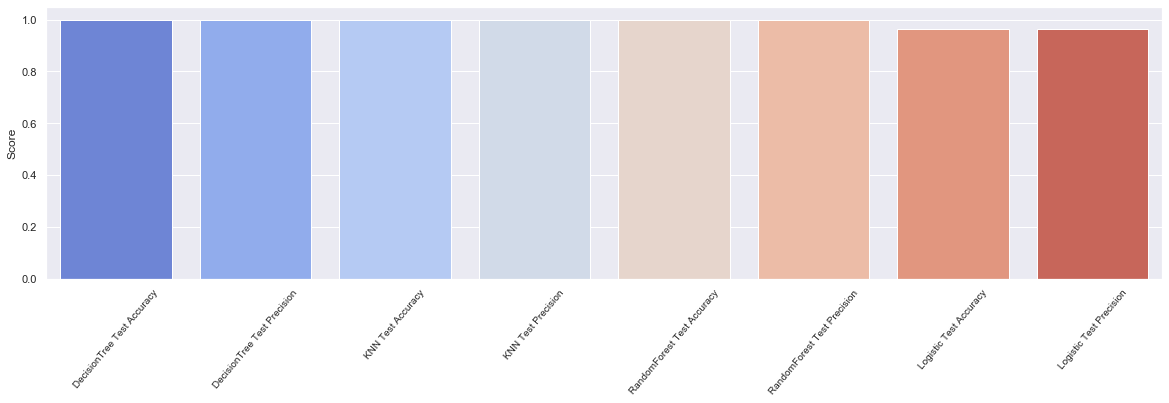

In [114]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_test.index,y = df_avearge_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_test.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores With Optimal Parameters

In [115]:
df_avearge_optimal_train = pd.concat([t1_df_optimal_train_dict, t2_df_optimal_train_dict, t3_df_optimal_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_train

Score
Decision Tree Train Precision  1.000000
KNN Train Precision            1.000000
Random Forest Train Accuracy   1.000000
Random Forest Train Precision  1.000000
KNN Train Accuracy             0.999025
Decision Tree Train Accuracy   0.998000
Logistic Train Accuracy        0.964764
Logistic Train Precision       0.964245

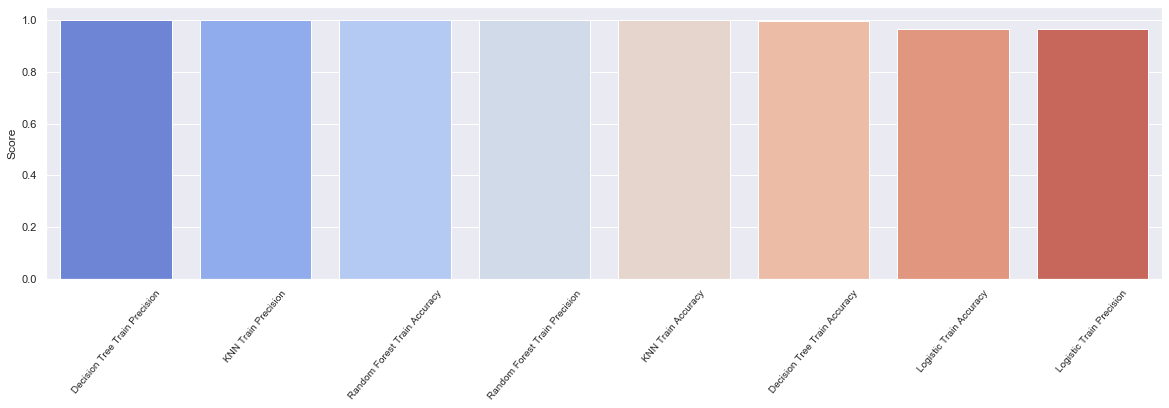

In [116]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_train.index,y = df_avearge_optimal_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores With Optimal Parameters

In [117]:
df_avearge_optimal_test = pd.concat([t1_df_optimal_test_dict, t2_df_optimal_test_dict, t3_df_optimal_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_test

Score
Decision Tree Test Precision  1.000000
KNN Test Accuracy             1.000000
KNN Test Precision            1.000000
Random Forest Test Accuracy   1.000000
Random Forest Test Precision  1.000000
Decision Tree Test Accuracy   0.997538
Logistic Test Accuracy        0.965333
Logistic Test Precision       0.964076

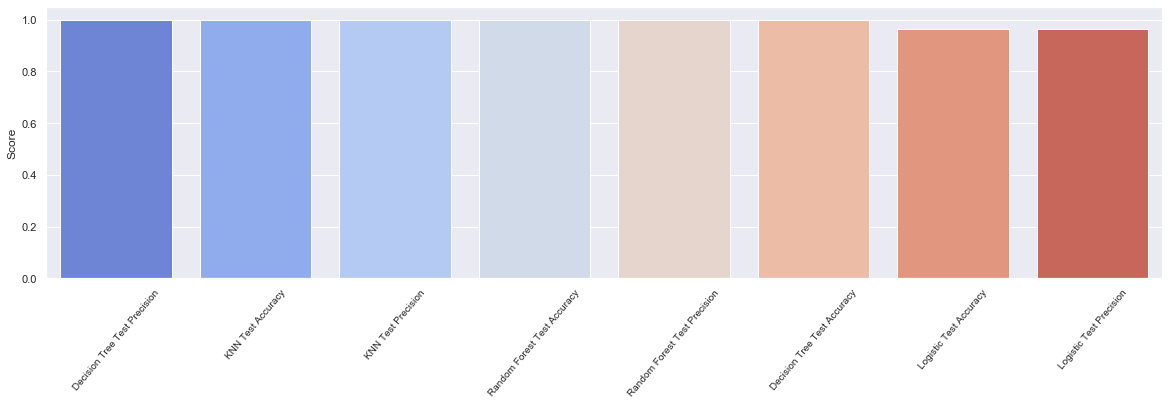

In [118]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_test.index,y = df_avearge_optimal_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_test.index,rotation = 50, fontsize = 10)

plt.show()